<a href="https://colab.research.google.com/github/rob-salter/Behavioural-Credit-Scoring-/blob/main/Thesis_github_upload.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold,RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import shap

from xgboost import plot_importance
from xgboost import XGBClassifier

In [ ]:
#upload the dataset
uploaded = files.upload()
df = pd.read_excel(io.BytesIO(uploaded['default_of_credit_card_clients.xlsx']))
df.head()

Saving default_of_credit_card_clients.xlsx to default_of_credit_card_clients (1).xlsx


ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -2     -2       3913       3102        689          0          0   
1      0      2       2682       1725       2682       3272       3455   
2      0      0      29239      14027      13559      14331      14948   
3      0      0      46990      48233      49291      28314      28959   
4      0      0       8617       5670      35835      20940      19146   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0          0         0       689         0         0         0         0   
1       3261         0      1000      1000      1000         0      2000   
2      15549      1518      1500      1000      1000      1000      5000   
3      29547      2000      2019      1200      1100      1069      1000   
4      19131      2000     36681     10000      9000       689       679   

   default payment next month  
0                           1  
1                           1  
2                           0  
3                           0  
4                           0

In [ ]:
pd.set_option('display.max_columns', 500)

In [ ]:
df.head(50)

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0    1      20000    2          2         1   24      2      2     -1     -1   
1    2     120000    2          2         2   26     -1      2      0      0   
2    3      90000    2          2         2   34      0      0      0      0   
3    4      50000    2          2         1   37      0      0      0      0   
4    5      50000    1          2         1   57     -1      0     -1      0   
5    6      50000    1          1         2   37      0      0      0      0   
6    7     500000    1          1         2   29      0      0      0      0   
7    8     100000    2          2         2   23      0     -1     -1      0   
8    9     140000    2          3         1   28      0      0      2      0   
9   10      20000    1          3         2   35     -2     -2     -2     -2   
10  11     200000    2          3         2   34      0      0      2      0   
11  12     260000    2          1         2   51     -1     -1     -1     -1   
12  13     630000    2          2         2   41     -1      0     -1     -1   
13  14      70000    1          2         2   30      1      2      2      0   
14  15     250000    1          1         2   29      0      0      0      0   
15  16      50000    2          3         3   23      1      2      0      0   
16  17      20000    1          1         2   24      0      0      2      2   
17  18     320000    1          1         1   49      0      0      0     -1   
18  19     360000    2          1         1   49      1     -2     -2     -2   
19  20     180000    2          1         2   29      1     -2     -2     -2   
20  21     130000    2          3         2   39      0      0      0      0   
21  22     120000    2          2         1   39     -1     -1     -1     -1   
22  23      70000    2          2         2   26      2      0      0      2   
23  24     450000    2          1         1   40     -2     -2     -2     -2   
24  25      90000    1          1         2   23      0      0      0     -1   
25  26      50000    1          3         2   23      0      0      0      0   
26  27      60000    1          1         2   27      1     -2     -1     -1   
27  28      50000    2          3         2   30      0      0      0      0   
28  29      50000    2          3         1   47     -1     -1     -1     -1   
29  30      50000    1          1         2   26      0      0      0      0   
30  31     230000    2          1         2   27     -1     -1     -1     -1   
31  32      50000    1          2         2   33      2      0      0      0   
32  33     100000    1          1         2   32      0      0      0      0   
33  34     500000    2          2         1   54     -2     -2     -2     -2   
34  35     500000    1          1         1   58     -2     -2     -2     -2   
35  36     160000    1          1         2   30     -1     -1     -2     -2   
36  37     280000    1          2         1   40      0      0      0      0   
37  38      60000    2          2         2   22      0      0      0      0   
38  39      50000    1          1         2   25      1     -1     -1     -2   
39  40     280000    1          1         2   31     -1     -1      2     -1   
40  41     360000    1          1         2   33      0      0      0      0   
41  42      70000    2          1         2   25      0      0      0      0   
42  43      10000    1          2         2   22      0      0      0      0   
43  44     140000    2          2         1   37      0      0      0      0   
44  45      40000    2          1         2   30      0      0      0      2   
45  46     210000    1          1         2   29     -2     -2     -2     -2   
46  47      20000    2          1         2   22      0      0      2     -1   
47  48     150000    2          5         2   46      0      0     -1      0   
48  49     380000    1          2         2   32     -1     -1     -1     -1   
49  

In [ ]:

df.info()
df = df.drop('ID', axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
df.describe()

LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    167484.322667      1.603733      1.853133      1.551867     35.485500   
std     129747.661567      0.489129      0.790349      0.521970      9.217904   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      6.000000      3.000000     79.000000   

              PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.016700     -0.133767     -0.166200     -0.220667     -0.266200   
std        1.123802      1.197186      1.196868      1.169139      1.133187   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

              PAY_6      BILL_AMT1      BILL_AMT2     BILL_AMT3  \
count  30000.000000   30000.000000   30000.000000  3.000000e+04   
mean      -0.291100   51223.330900   49179.075167  4.701315e+04   
std        1.149988   73635.860576   71173.768783  6.934939e+04   
min       -2.000000 -165580.000000  -69777.000000 -1.572640e+05   
25%       -1.000000    3558.750000    2984.750000  2.666250e+03   
50%        0.000000   22381.500000   21200.000000  2.008850e+04   
75%        0.000000   67091.000000   64006.250000  6.016475e+04   
max        8.000000  964511.000000  983931.000000  1.664089e+06   

           BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count   30000.000000   30000.000000   30000.000000   30000.000000   
mean    43262.948967   40311.400967   38871.760400    5663.580500   
std     64332.856134   60797.155770   59554.107537   16563.280354   
min   -170000.000000  -81334.000000 -339603.000000       0.000000   
25%      2326.750000    1763.000000    1256.000000    1000.000000   
50%     19052.000000   18104.500000   17071.000000    2100.000000   
75%     54506.000000   50190.500000   49198.250000    5006.000000   
max    891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default payment next month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000

In [ ]:
df = df.rename(columns={'default payment next month': 'default_payment_next_month'})
X = df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0','BILL_AMT1','PAY_AMT1', 'PAY_2','BILL_AMT2','PAY_AMT2','PAY_3','BILL_AMT3','PAY_AMT3','PAY_4','BILL_AMT4','PAY_AMT4',
 'PAY_5','BILL_AMT5','PAY_AMT5','PAY_6','BILL_AMT6','PAY_AMT6']]
y = df['default_payment_next_month']

Split the dataset into 3; 60% training, 20% validation 20% testing.

In [ ]:

from sklearn.model_selection import train_test_split
X_1, X_test, y_1, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

count_0_test = 0
count_1_test = 0
for line in y_test:
  if line == 0:
    count_0_test += 1
  if line == 1:
    count_1_test += 1

count_0_train = 0
count_1_train = 0
for line in y_1:
  if line == 0:
    count_0_train += 1
  if line == 1:
    count_1_train += 1

percentage_test = round((count_1_test / count_0_test) * 100, 2)
percentage_train = round((count_1_train / count_0_train) * 100, 2)

print("class distribution in train_set " + str(percentage_train) + "% default(" + str(count_1_train) + ") " + str(100 - percentage_train) + "% not default(" + str(count_0_train) + ")" + " total: " + str(count_1_train + count_0_train))
print("class distribution in test_set " + str(percentage_test) + "% default(" + str(count_1_test) + ") " + str(100 - percentage_test) + "% not default(" + str(count_0_test) + ")" + " total: " + str(count_1_test + count_0_test))

class distribution in train_set 28.4% default(5309) 71.6% not default(18691) total: 24000
class distribution in test_set 28.4% default(1327) 71.6% not default(4673) total: 6000


In [ ]:
X_train_pre, X_val_pre, y_train, y_val = train_test_split(X_1, y_1, test_size=0.20, random_state=42, stratify=y_1)

count_0_test = 0
count_1_test = 0
for line in y_val:
  if line == 0:
    count_0_test += 1
  if line == 1:
    count_1_test += 1

count_0_train = 0
count_1_train = 0
for line in y_train:
  if line == 0:
    count_0_train += 1
  if line == 1:
    count_1_train += 1

percentage_test = round((count_1_test / count_0_test) * 100, 2)
percentage_train = round((count_1_train / count_0_train) * 100, 2)

print("class distribution in train_set " + str(percentage_train) + "% default(" + str(count_1_train) + ") " + str(100 - percentage_train) + "% not default(" + str(count_0_train) + ")" + " total: " + str(count_1_train + count_0_train))
print("class distribution in test_set " + str(percentage_test) + "% default(" + str(count_1_test) + ") " + str(100 - percentage_test) + "% not default(" + str(count_0_test) + ")" + " total: " + str(count_1_test + count_0_test))

class distribution in train_set 28.4% default(4247) 71.6% not default(14953) total: 19200
class distribution in test_set 28.41% default(1062) 71.59% not default(3738) total: 4800


# Data Cleaning

In [ ]:
from category_encoders import TargetEncoder


#select only numerical features
numeric_features = ['LIMIT_BAL','AGE','BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
cat_features = ['SEX', 'EDUCATION', 'MARRIAGE','PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

def copy_df(df):
  return df.copy()

def scaler(df,numeric_features):
  df[numeric_features] = StandardScaler().fit_transform(df[numeric_features])
  return df

def category_dtype(df,cat_features):
  for col in cat_features:
    df[col] = df[col].astype('category')
  return df  

def target_enc(df,cat_features,y):
  df[cat_features] = TargetEncoder(min_samples_leaf=20, smoothing=10).fit_transform(df[cat_features],y)
  return df

def reorder_cols(df,col_order):
  return df[col_order]


# X_1= (X_train_pre.pipe(copy_df).
#                    pipe(scaler,numeric_features).
#                    pipe(category_dtype,cat_features).
#                    pipe(target_enc,cat_features,y_train))

# X_test = (X_val_pre.pipe(copy_df).
#                 pipe(scaler,numeric_features).
#                 pipe(category_dtype,cat_features).
#                 pipe(target_enc,cat_features,y_val))




In [ ]:
X_train= (X_train_pre.pipe(copy_df).
                   pipe(scaler,numeric_features).
                   pipe(category_dtype,cat_features).
                   pipe(target_enc,cat_features,y_train))

X_val = (X_val_pre.pipe(copy_df).
                pipe(scaler,numeric_features).
                pipe(category_dtype,cat_features).
                pipe(target_enc,cat_features,y_val))

# EDA

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


<Axes: >

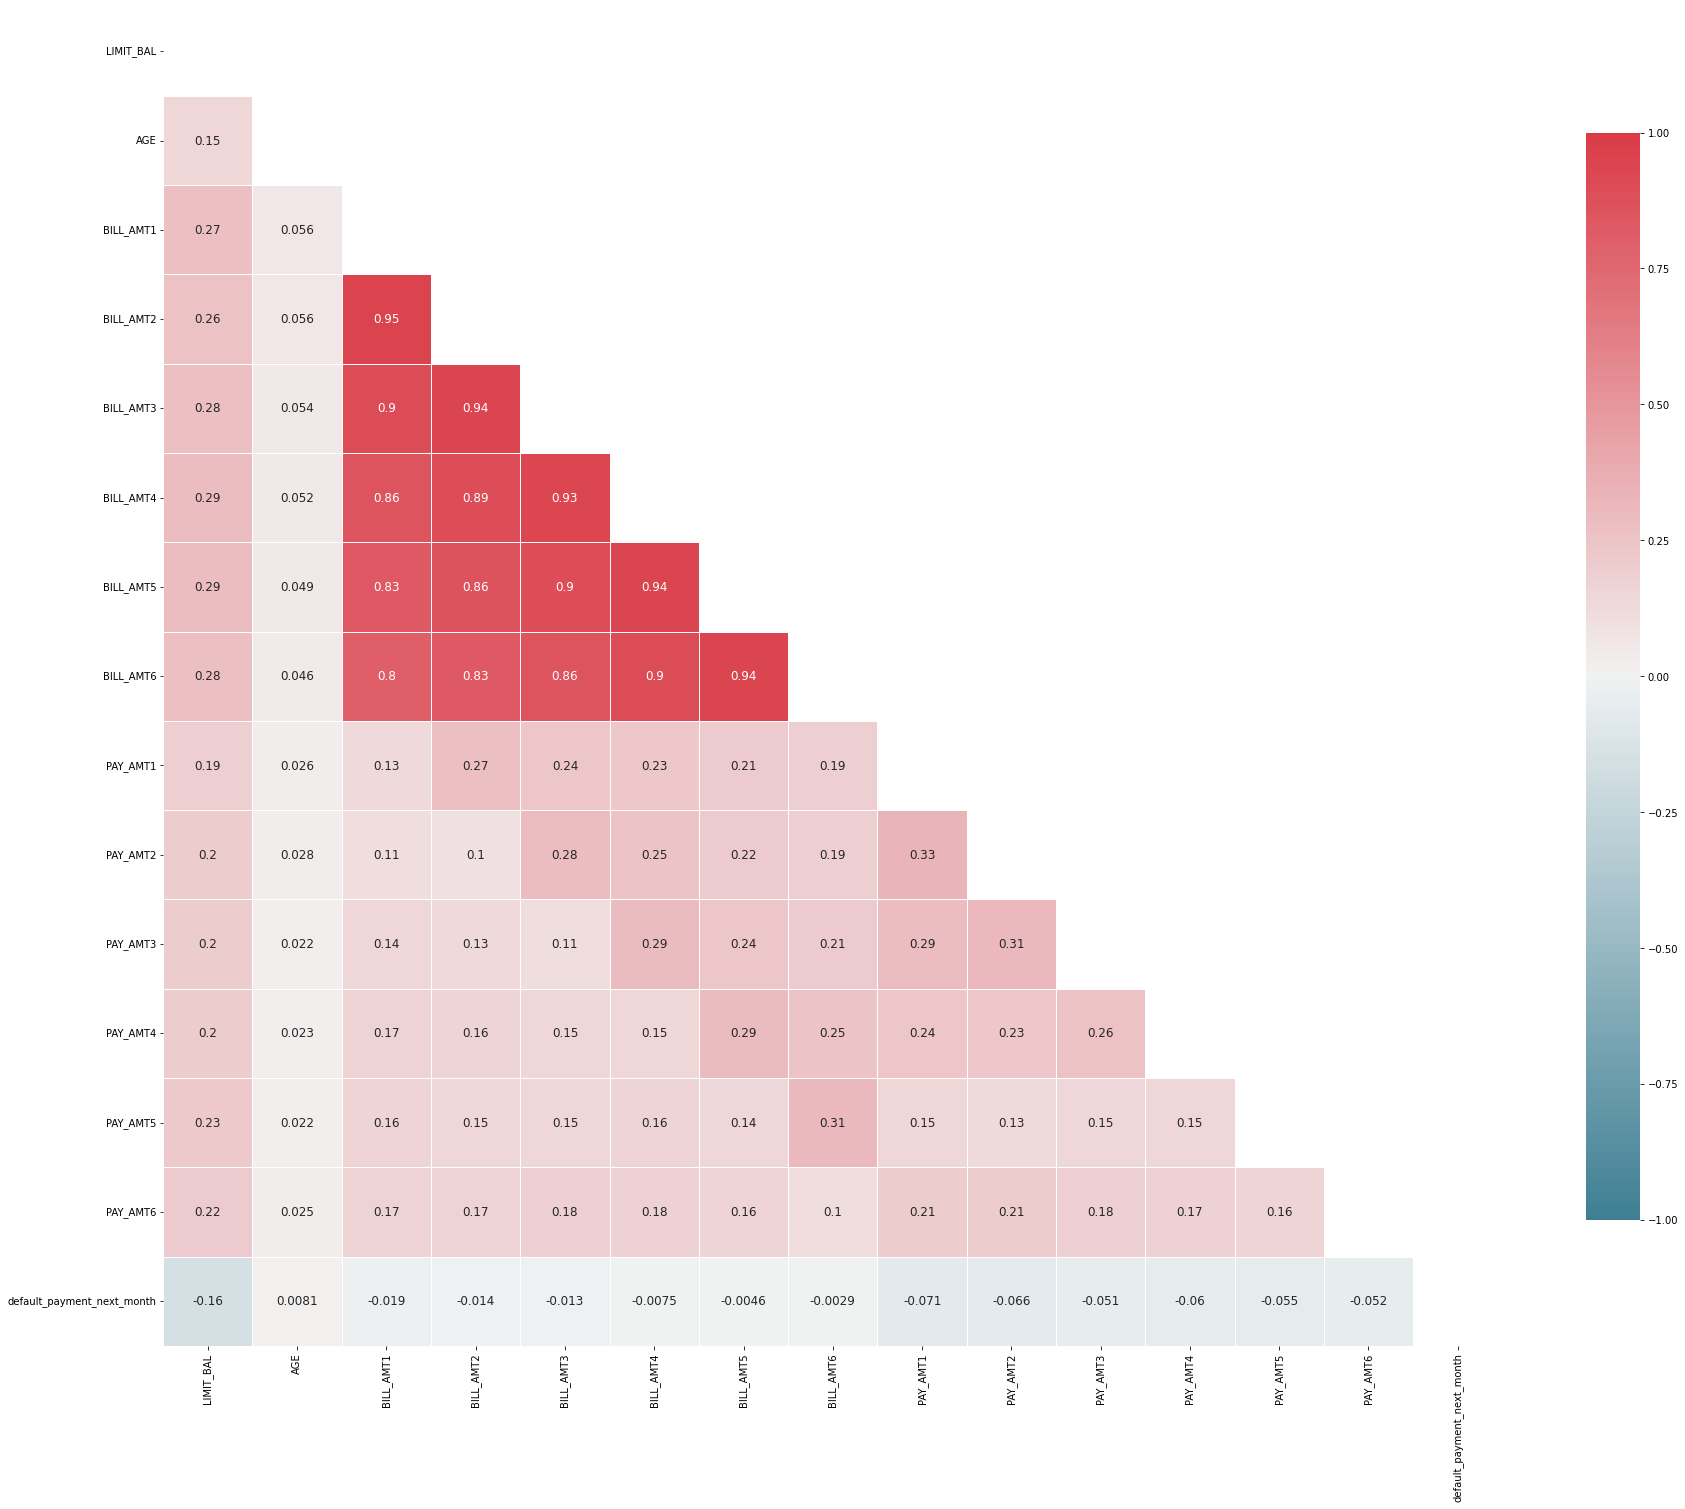

In [ ]:
#full X_train

eda_features = ['LIMIT_BAL','AGE','BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','default_payment_next_month']

training_df = pd.concat([X_train_pre,y_train],axis=1)

eda_df = training_df[eda_features]

#training_df = training_df.rename(columns={'default payment next month': 'default_payment_next_month'})

# Compute the correlation matrix
corr_matrix = eda_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 40))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = True,annot_kws = {'size': 12})

In [ ]:
training_df['SEX'].value_counts()

2    11612
1     7588
Name: SEX, dtype: int64

In [ ]:
defaults = training_df[training_df['default_payment_next_month'] == 1]
defaults['SEX'].value_counts()

2    2419
1    1828
Name: SEX, dtype: int64

In [ ]:
non_defaults = training_df[training_df['default_payment_next_month'] == 0]
non_defaults['SEX'].value_counts()

2    9193
1    5760
Name: SEX, dtype: int64

In [ ]:
training_df['PAY_0'].value_counts() 

 0    9379
-1    3659
 1    2410
-2    1745
 2    1724
 3     199
 4      46
 5      14
 6      10
 7       7
 8       7
Name: PAY_0, dtype: int64

In [ ]:
defaults['PAY_0'].value_counts()

 2    1199
 0    1186
 1     828
-1     605
-2     218
 3     157
 4      31
 5       7
 7       6
 6       6
 8       4
Name: PAY_0, dtype: int64

In [ ]:
test = training_df[training_df['PAY_AMT1']> 400000]
test

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  BILL_AMT1  PAY_AMT1  \
29820     400000    1          2         2   37      1     396343    423903   
12330     300000    1          2         1   37      1    -165580    505000   
28716     340000    2          1         3   42     -1     139808    873552   

       PAY_2  BILL_AMT2  PAY_AMT2  PAY_3  BILL_AMT3  PAY_AMT3  PAY_4  \
29820     -1     394858     15100      0     395716     14600      0   
12330     -1     324392       331      2     296931      1070      0   
28716     -1     176743   1215471     -1      34402    889043     -1   

       BILL_AMT4  PAY_AMT4  PAY_5  BILL_AMT5  PAY_AMT5  PAY_6  BILL_AMT6  \
29820     385947     13000      0     305542      9500      0     271385   
12330      30355     17771      0      26771     18000      0      23737   
28716     205931    621000     -1     265431     20000      0     270237   

       PAY_AMT6  default_payment_next_month  
29820      9500                           0  
12330     16079                           0  
28716    145000                           0

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


<AxesSubplot:>

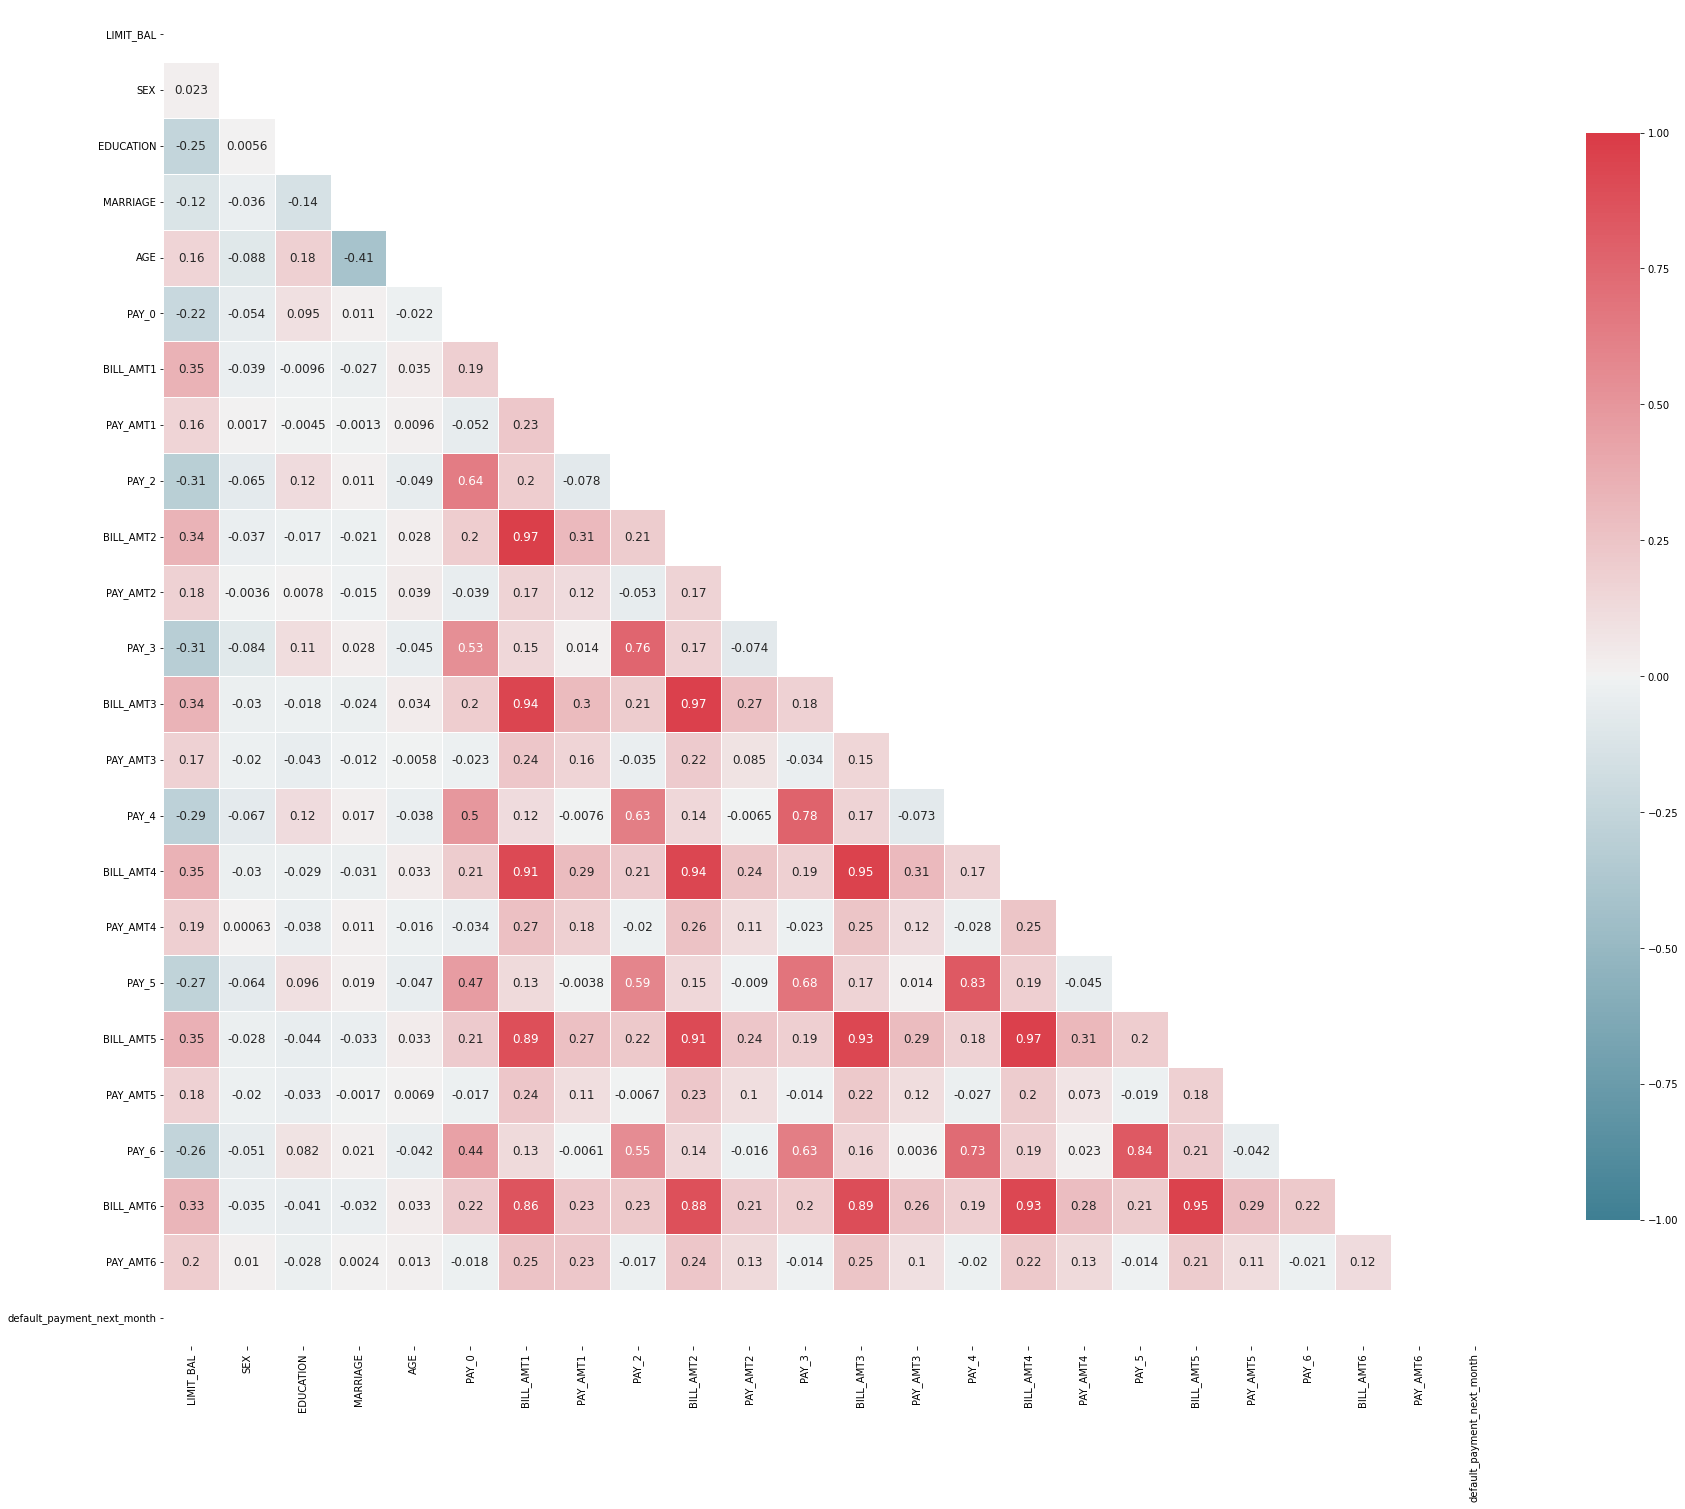

In [ ]:
# #X train defaulted


# defaulted_customers = training_df[training_df['default_payment_next_month']== 1]



# # Compute the correlation matrix
# corr = defaulted_customers.corr()

# # Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(corr, dtype=np.bool))

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(30, 40))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = True,annot_kws = {'size': 12})

In [ ]:
defaulted_customers

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  BILL_AMT1  PAY_AMT1  \
6806      100000    1          2         2   25      2      97614      3000   
12555     150000    2          1         2   30      0     150311      5500   
27929      20000    2          2         1   28      2      17023      2000   
24966     160000    1          1         2   37      2      63043      6079   
13274      50000    2          2         2   23      0      34997      1900   
...          ...  ...        ...       ...  ...    ...        ...       ...   
13802      50000    1          3         2   46      1      49220         0   
21742      20000    2          2         1   24      0      16505      2905   
13452      50000    1          3         2   32      2      40486      1691   
6884      110000    1          2         1   38      2      96898      4826   
14812      10000    2          2         1   49      0       3100      1073   

       PAY_2  BILL_AMT2  PAY_AMT2  PAY_3  BILL_AMT3  PAY_AMT3  PAY_4  \
6806       0      50976         0      0       -212         0     -2   
12555      0     138240      3400      0     138887      5883      0   
27929      2      18432         0      2      17848      1574      0   
24966      2      67460      3064      2      68554         0      2   
13274      0      36030      1610      0      36740      1339      0   
...      ...        ...       ...    ...        ...       ...    ...   
13802      2      48161      2000      0      49310      1900      0   
21742      0      18817         0      2      18227      1720      0   
13452      0      41526      1704      0      42539      1697      0   
6884       2      96071         5      2      93321      4000      0   
14812      0       4116      1237      0       5280       500      0   

       BILL_AMT4  PAY_AMT4  PAY_5  BILL_AMT5  PAY_AMT5  PAY_6  BILL_AMT6  \
6806        -212         0     -2       -212       500     -1        138   
12555     144170      5800      0     149970      2905      0     145262   
27929      19103       700      0      19229       688      0      18856   
24966      66841     10000      0      74763     15000      0      87692   
13274      37469      1387      0      38254      1395      0      39014   
...          ...       ...    ...        ...       ...    ...        ...   
13802      49725      2007      0      49910      2000      0      48694   
21742      19632      1754      0      20298       893      2      20337   
13452      43532      1558      0      42858      1727      0      43481   
6884       94034      7300      0      99531         0      2      96614   
14812       5543       300      0       5605       205      0       5717   

       PAY_AMT6  default_payment_next_month  
6806        500                           1  
12555      2799                           1  
27929       687                           1  
24966         0                           1  
13274      1452                           1  
...         ...                         ...  
13802      2012                           1  
21742         0                           1  
13452      1446                           1  
6884       4000                           1  
14812       300                           1  

[4247 rows x 24 columns]

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


<AxesSubplot:>

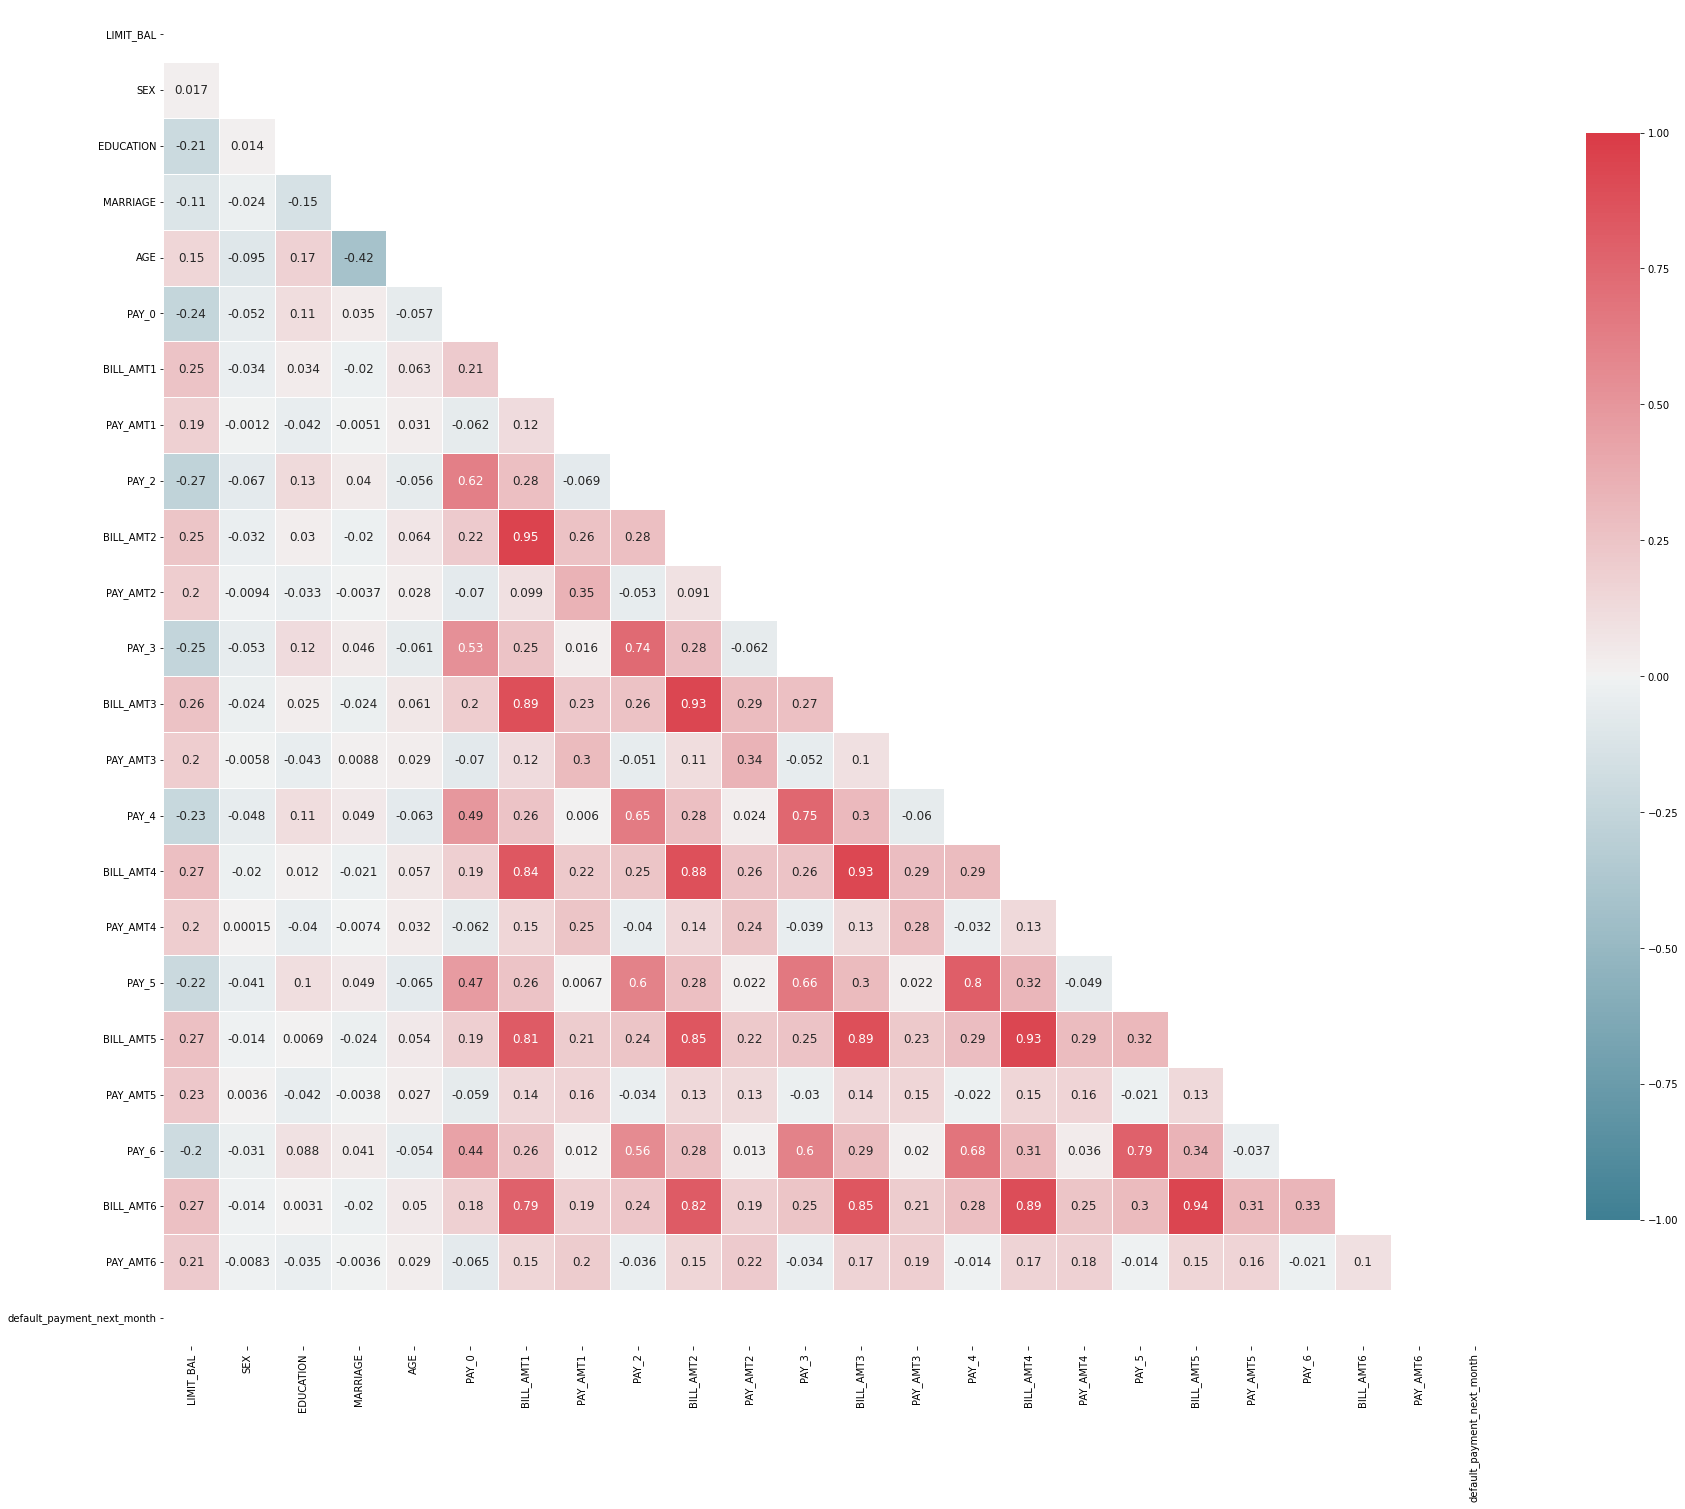

In [ ]:
# #X_train not defaulted



# not_defaulted_customers = training_df[training_df['default_payment_next_month']== 0]

# # Compute the correlation matrix
# corr = not_defaulted_customers.corr()

# # Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(corr, dtype=np.bool))

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(30, 40))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = True,annot_kws = {'size': 12})

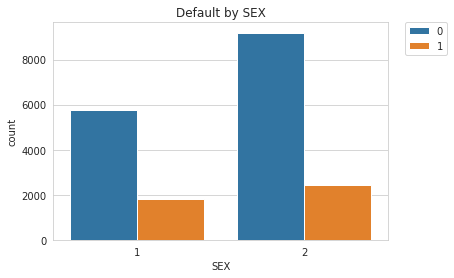

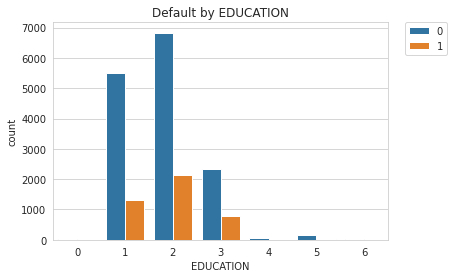

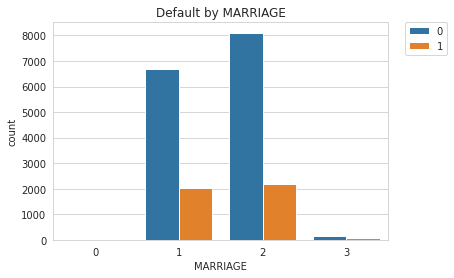

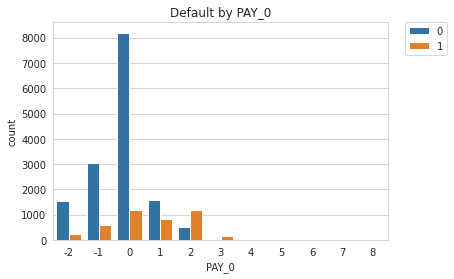

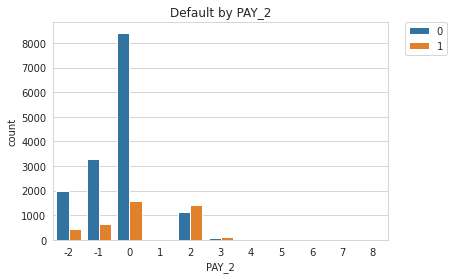

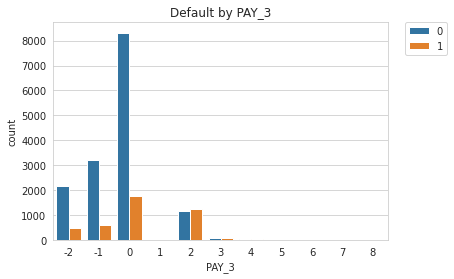

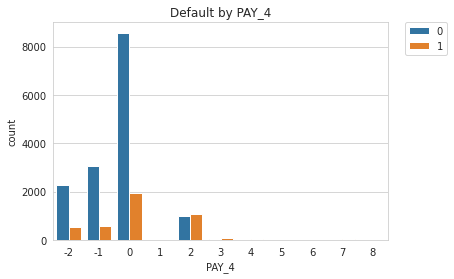

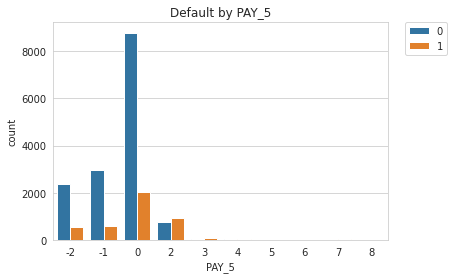

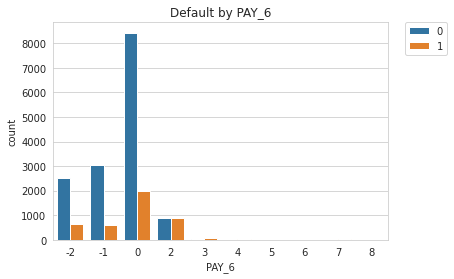

In [ ]:
# def plot_box(df, cols, y):
#     for  col in (cols):
#     #for col in cols:
#         sns.set_style("whitegrid")
#         sns.countplot(hue=y, x=col, data=df)
#         plt.xlabel(col) # Set text for the x axis
#         plt.ylabel('count')# Set text for y axis
#         plt.title('Default by ' + str(col))
#         plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#         plt.show()
        

# cat_features = ['SEX', 'EDUCATION', 'MARRIAGE','PAY_0', 'PAY_2',
#        'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
# plot_box(X_train_pre, cat_features, y_train)

<AxesSubplot:>

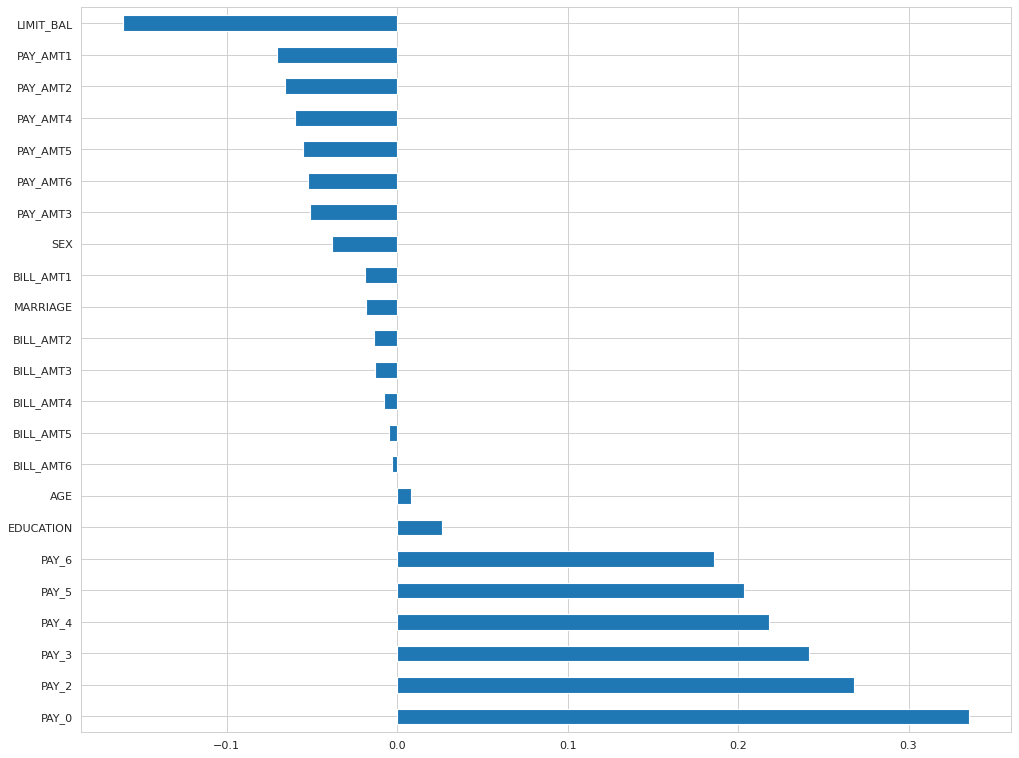

In [ ]:
# from matplotlib.pyplot import figure
# figure(num=None, figsize=(15,12), dpi=80, facecolor='w', edgecolor='k')
# corr_matrix.copy().default_payment_next_month.drop('default_payment_next_month').sort_values(ascending=False).plot.barh()

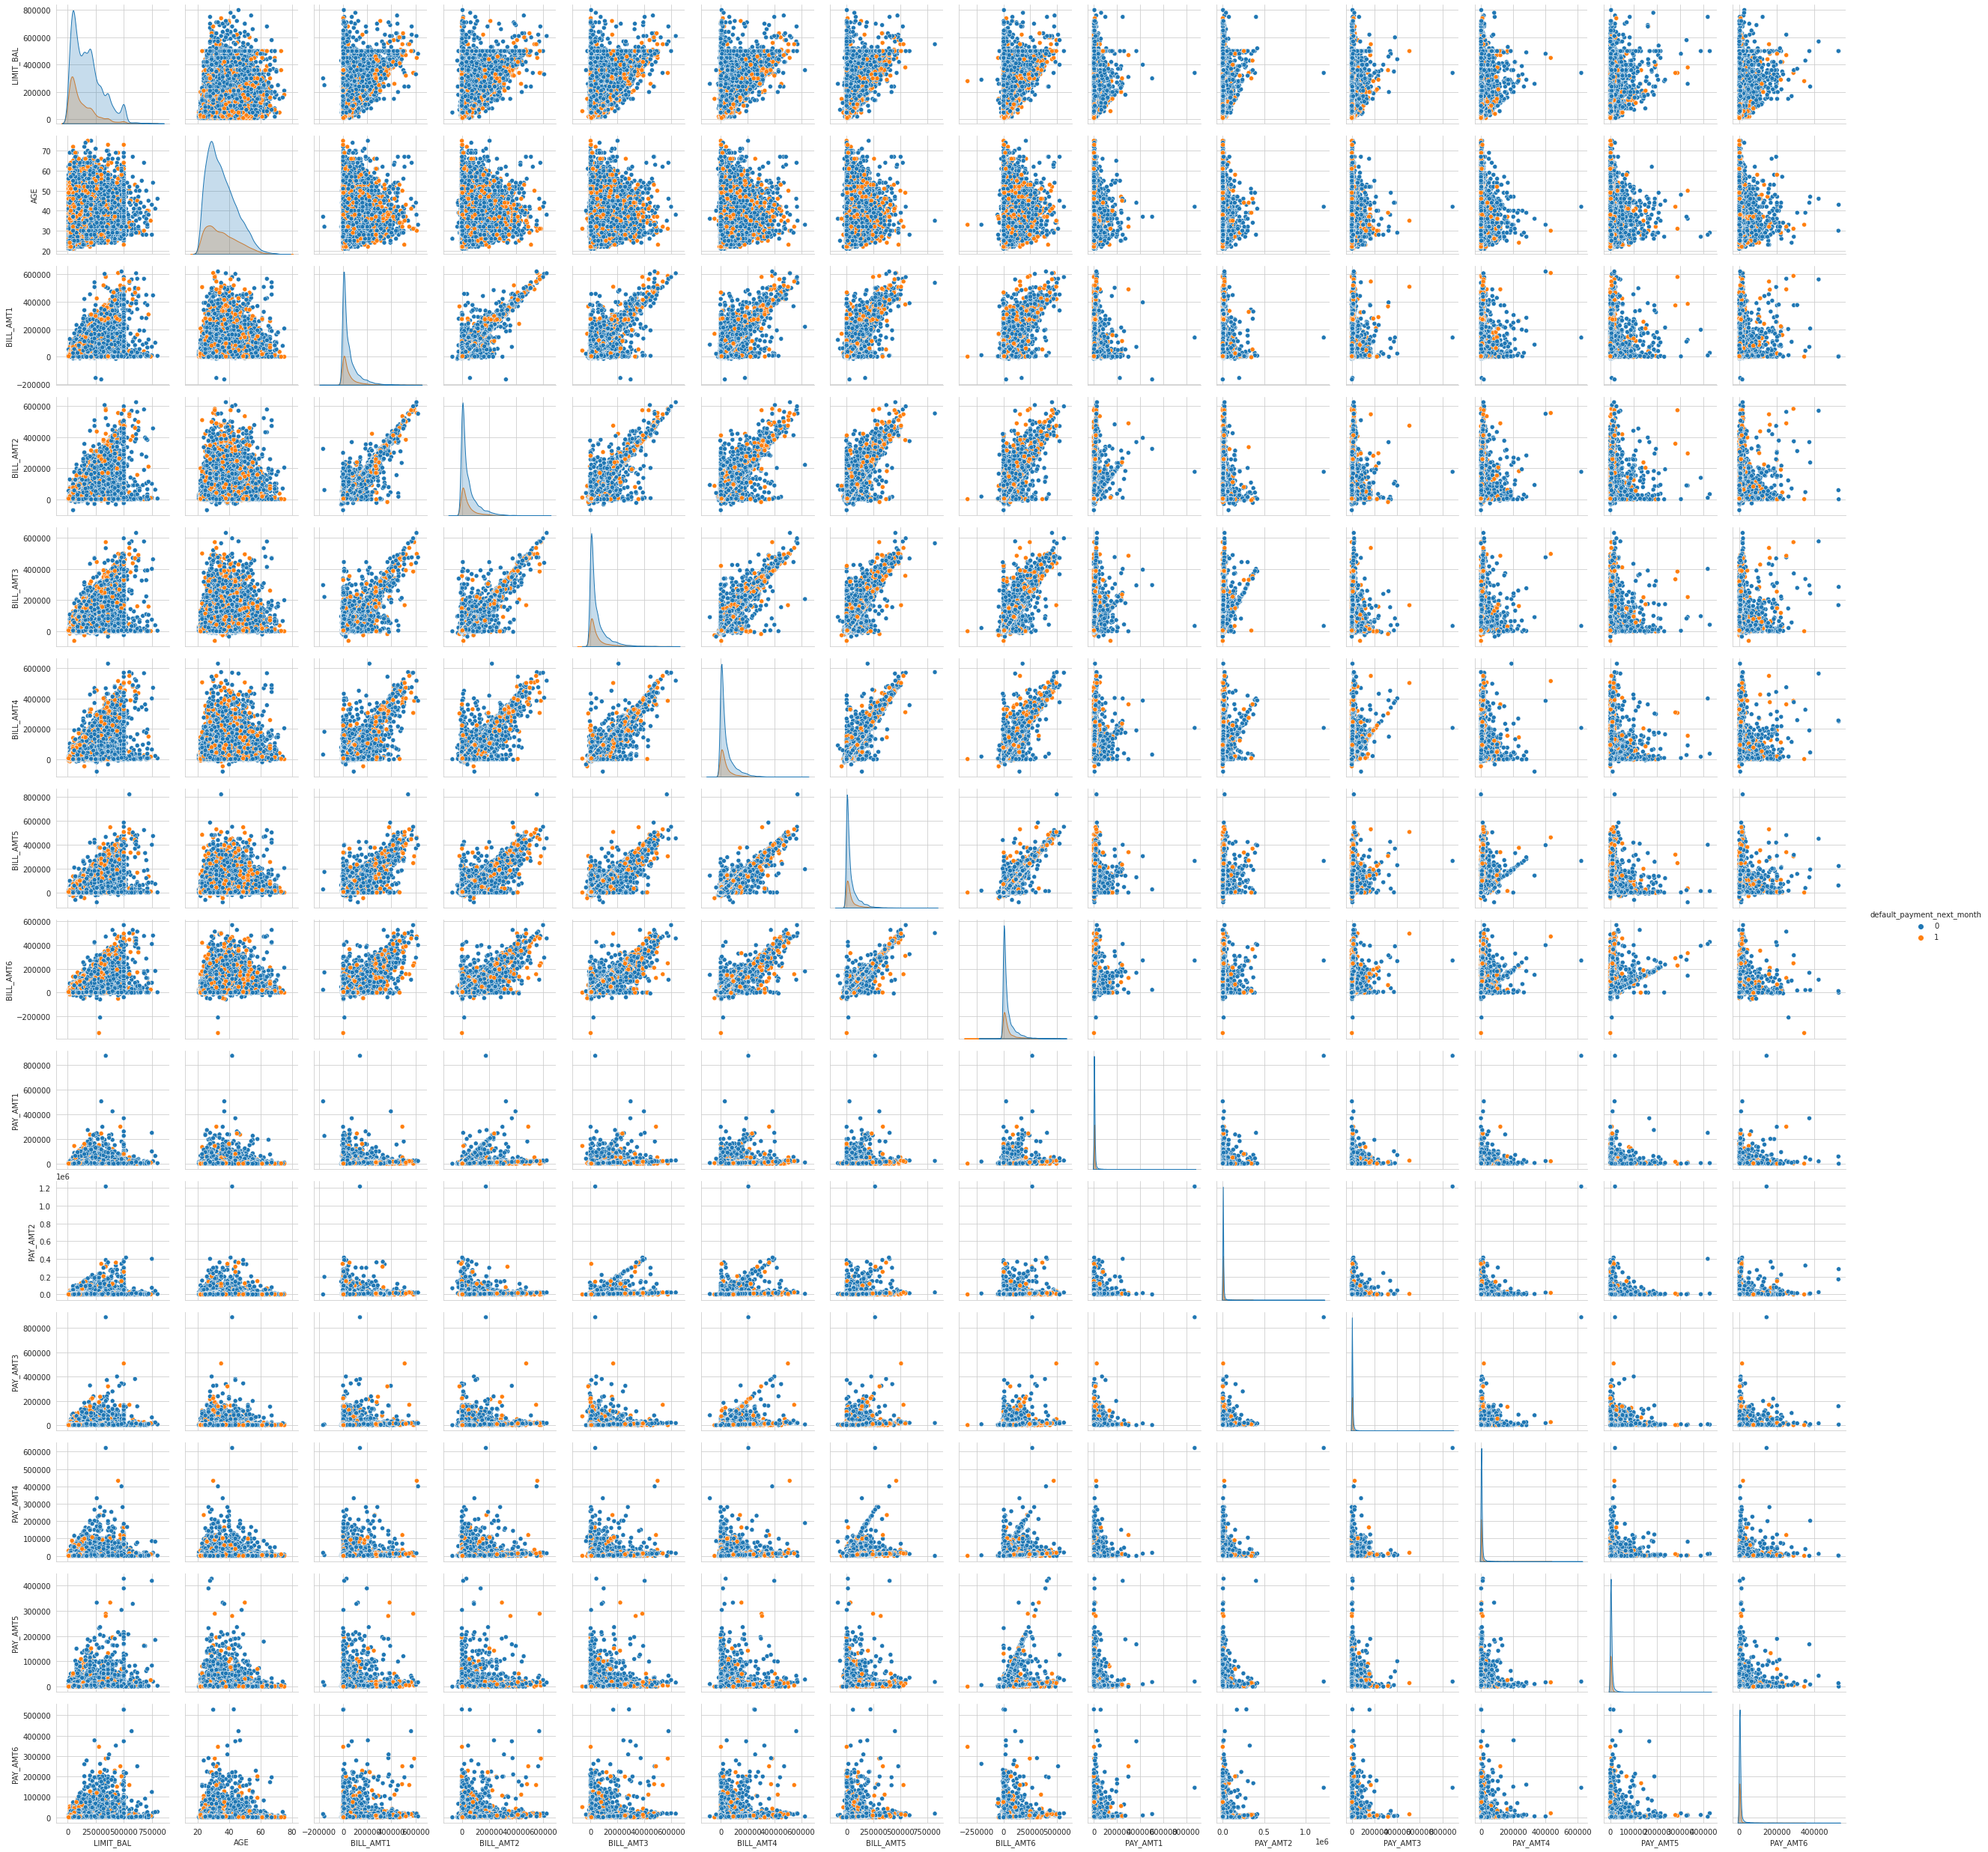

In [ ]:

# features = numeric_features = ['LIMIT_BAL','AGE','BILL_AMT1', 'BILL_AMT2',
#        'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
#        'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','default_payment_next_month']

# # X_train_pairplot = 
# # training_df.drop([cat_features],axis=1)
# sns.pairplot(training_df[features], hue='default_payment_next_month')

<Figure size 576x504 with 0 Axes>

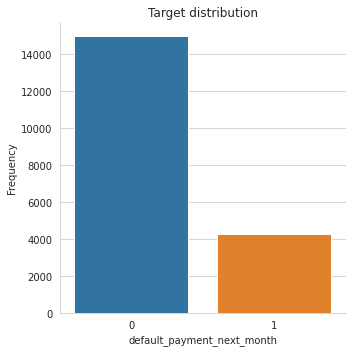

In [ ]:
plt.figure(figsize = (8,7))
sns.catplot(data=training_df, kind='count', x='default_payment_next_month')
plt.xlabel('default_payment_next_month')
plt.ylabel('Frequency')
plt.title('Target distribution')
plt.tight_layout()

<Axes: xlabel='AGE', ylabel='Density'>

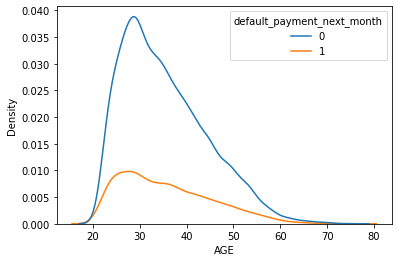

In [ ]:
sns.kdeplot(data=training_df, x='AGE', hue='default_payment_next_month')

<Axes: xlabel='BILL_AMT6', ylabel='PAY_AMT1'>

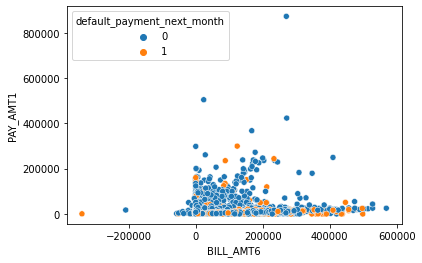

In [ ]:
sns.scatterplot(data=training_df, x='BILL_AMT6',y='PAY_AMT1', hue='default_payment_next_month')

In [ ]:
X_test.iloc[0,:]

LIMIT_BAL    50000
SEX              1
EDUCATION        2
MARRIAGE         2
AGE             46
PAY_0           -1
BILL_AMT1     1540
PAY_AMT1     26060
PAY_2           -1
BILL_AMT2    26060
PAY_AMT2         0
PAY_3           -1
BILL_AMT3        0
PAY_AMT3      3472
PAY_4           -1
BILL_AMT4     2650
PAY_AMT4      2320
PAY_5            0
BILL_AMT5     3320
PAY_AMT5      1764
PAY_6            0
BILL_AMT6     2764
PAY_AMT6      2841
Name: 6907, dtype: int64

In [ ]:
y_test.iloc[0]

0

# Modelling

In [ ]:

# # Initial evaluation of models.
# models = []
# models.append(('LR', LogisticRegression(solver='saga', max_iter=200)))
# models.append(('XGB', XGBClassifier()))

# # evaluate each model in turn
# results = []
# names = []
# for name, model in models:
#     kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
#     cv_results = cross_val_score(model, X_train, y_train.values.ravel(), cv=kfold, scoring='roc_auc',n_jobs=1, verbose=True)
#     results.append(cv_results)
#     names.append(name)
#     print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.

LR: 0.766973 (0.007043)
XGB: 0.759285 (0.007067)

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   32.9s finished


roc auc with no one hot encoding

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

LR: 0.726942 (0.010028)
XGB: 0.761182 (0.007798)

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   18.0s finished

With one hot encoding roc auc
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   18.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

LR: 0.662018 (0.008791)
XGB: 0.709152 (0.010955)

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   34.8s finished

roc auc w. target encoding
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

LR: 0.766974 (0.007039)
XGB: 0.759285 (0.007067)

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   17.0s finished




In [ ]:
test_models = []

In [ ]:
# # Logistic Regression
# kf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

# model = LogisticRegression()

# penalty = ['l1', 'l2']
# C = [0.001, 0.01, 0.1, 1, 10]
# class_weight = [None, 'balanced']
# solver = ['liblinear', 'saga']

# random_grid = {'penalty': penalty,
#                'C': C,
#                'class_weight': class_weight,
#                'solver': solver
#               }

# random_search = RandomizedSearchCV(estimator = model,
#                                    param_distributions = random_grid,
#                                    n_iter = 10,
#                                    cv = kf,
#                                    scoring = 'f1_micro',
#                                    n_jobs = 1,
#                                    random_state=1,
#                                    verbose=10
#                                   )

# random_search = random_search.fit(X_train, y_train)

# print("Parameters of the best_estimator:")
# print(random_search.best_params_)
# test_models.append(('LR',random_search.best_estimator_))

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Parameters of the best_estimator:
{'solver': 'liblinear', 'penalty': 'l2', 'class_weight': None, 'C': 0.001}


In [ ]:
# #if we want to do the hyperparameters, XGB Classifier might look something like this

# # XGB Classifier
# kf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

# model = XGBClassifier()

# n_estimators = [100, 300, 400, 500, 700, 1000, 1200, 1700]
# learning_rate = [0.0001, 0.001, 0.01, 0.02, 0.05, 0.1]
# max_depth = [6, 10, 12, 15, 20]
# subsample = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0,1.1,1.2,1.3]
# colsample_bytree = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,1.1,1.2,1.3,1.4]


# random_grid = {'n_estimators': n_estimators,
#                'learning_rate': learning_rate,
#                'max_depth': max_depth,
#                'subsample': subsample,
#                'colsample_bytree': colsample_bytree,
#                }

# # fit_params={"early_stopping_rounds":10, 
# #             "eval_metric" : "f1_micro", 
# #             "eval_set" : [[X_val, y_val]]}

# random_search = RandomizedSearchCV(estimator = model,
#                                    param_distributions = random_grid,
#                                    n_iter = 50,
#                                    cv = kf,
#                                    scoring = 'roc_auc',
#                                    n_jobs = 1,
#                                    random_state=1,
#                                    verbose=10
#                                   )

# random_search = random_search.fit(X_train, y_train)

# print("Parameters of the best_estimator:")
# print(random_search.best_params_)
# test_models.append(('XGB',random_search.best_estimator_))
# print("Mean cross-validated RMSE of the best_estimator: {}".format(-random_search.best_score_))
# model = random_search.best_estimator_
# print("Mean cross-validated F1 score of the best_estimator: {}".format(random_score.best_score_))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5; 1/50] START colsample_bytree=0.4, learning_rate=0.0001, max_depth=15, n_estimators=400, subsample=0.6
[CV 1/5; 1/50] END colsample_bytree=0.4, learning_rate=0.0001, max_depth=15, n_estimators=400, subsample=0.6;, score=0.786 total time=  17.4s
[CV 2/5; 1/50] START colsample_bytree=0.4, learning_rate=0.0001, max_depth=15, n_estimators=400, subsample=0.6
[CV 2/5; 1/50] END colsample_bytree=0.4, learning_rate=0.0001, max_depth=15, n_estimators=400, subsample=0.6;, score=0.783 total time=  18.0s
[CV 3/5; 1/50] START colsample_bytree=0.4, learning_rate=0.0001, max_depth=15, n_estimators=400, subsample=0.6
[CV 3/5; 1/50] END colsample_bytree=0.4, learning_rate=0.0001, max_depth=15, n_estimators=400, subsample=0.6;, score=0.767 total time=  17.4s
[CV 4/5; 1/50] START colsample_bytree=0.4, learning_rate=0.0001, max_depth=15, n_estimators=400, subsample=0.6
[CV 4/5; 1/50] END colsample_bytree=0.4, learning_rate=0.0001, max_d


140 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py", line 1490, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.9/dist-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.9/dist-packages/xgboost/training.py", line 185, i

Parameters of the best_estimator:
{'subsample': 0.6, 'n_estimators': 400, 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 1.0}


n estimators slows the model down. Trim down this parameter, or make smaller with a few bigger values. n_estimators at 1250 and 1500 doesn't produce any marked improvment in the auc. 

Seems one hot encoding is making the model worse. Let's try target encoding to see if any improvement. 
https://medium.com/analytics-vidhya/stop-one-hot-encoding-your-categorical-variables-bbb0fba89809 

Parameters of the best_estimator:
{'subsample': 0.6, 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.5}


used a tailormade gridsearch for selecting epochs and batch size for the lstm full model.

Parameters of the best_estimator: latest run with 50 iterations
{'subsample': 0.6, 'n_estimators': 400, 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 1.0}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving xgb_model.sav to xgb_model (1).sav
model loaded


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import brier_score_loss
from sklearn.metrics import f1_score
from imblearn.metrics import geometric_mean_score

# val_models = [('LR', LogisticRegression(solver='saga', max_iter=200)), ('XGB',XGBClassifier(subsample= 0.6, n_estimators=300, max_depth= 10, learning_rate= 0.01, colsample_bytree= 0.5))]

def ml_modelling(X_train,y_train,X_test,y_test,models):

  #experiment building

  results = pd.DataFrame(columns=['classifier','auc','accuracy', 'brier_score','f1_score','g_mean'])
  roc_plot_data = pd.DataFrame(columns=['classifier', 'fpr', 'tpr', 'auc'])
  contingency_values = pd.DataFrame(y_test.copy())
  counter = 1
  for name, model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    yproba = model.predict_proba(X_test)[:,1]
    contingency_values[name] = y_pred
    fpr, tpr, thresholds = roc_curve(y_test, yproba)
    auc = roc_auc_score(y_test, yproba)
    accuracy = accuracy_score(y_test,y_pred)
    brier_score = brier_score_loss(y_test, yproba)
    f_one_score = f1_score(y_test,y_pred)
    g_mean = geometric_mean_score(y_test,y_pred)

    results = results.append({'classifier':name,
                              'auc':auc,
                              'accuracy':accuracy,
                              'brier_score':brier_score,
                              'f1_score':f_one_score,
                              'g_mean':g_mean},ignore_index=True)
    roc_plot_data = roc_plot_data.append({'classifier':model.__class__.__name__,
                              'fpr':fpr,
                              'tpr':tpr,
                              'auc':auc,},ignore_index=True)
    print("iteration " + str(counter) + " " + name)
    counter += 1
    
  return results,roc_plot_data, contingency_values
      
  # results.set_index('classifiers', inplace=True)    
  # roc_plot_data.set_index('classifier', inplace=True)


In [ ]:
validation_results,validation_roc_plot_data,val_contingency_values = ml_modelling(X_train,y_train,X_val,y_val,val_models)

0    4277
1     523
Name: XGB, dtype: int64

In [ ]:
validation_results

classifier       auc  accuracy  brier_score  f1_score    g_mean
0         LR  0.757713  0.815417     0.138831  0.439241  0.558386
1        XGB  0.778640  0.815417     0.136768  0.429858  0.548824

In [ ]:
validation_roc_plot_data.head(15)
validation_roc_plot_data

classifier                                                fpr  \
0  LogisticRegression  [0.0, 0.0, 0.0, 0.00026752273943285177, 0.0002...   
1       XGBClassifier  [0.0, 0.0, 0.0, 0.00026752273943285177, 0.0002...   

                                                 tpr       auc  
0  [0.0, 0.0009416195856873823, 0.002824858757062...  0.757713  
1  [0.0, 0.0009416195856873823, 0.003766478342749...  0.778640

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   classifier  2 non-null      object 
 1   fpr         2 non-null      object 
 2   tpr         2 non-null      object 
 3   auc         2 non-null      float64
dtypes: float64(1), object(3)
memory usage: 192.0+ bytes


classifier       auc  accuracy  brier_score  f1_score    g_mean
0         LR  0.760983  0.817917     0.137736  0.459158  0.576401
1        XGB  0.741373  0.813958     0.146026  0.436593  0.557112

--------------------------------------------------------------------------------------

#LSTM MODEL

In [ ]:
def lstm_data_cleaning(X_train,X_test):
  #split into temporal and non-temporal features
  train_non_temporal_data = X_train.iloc[:,:5]
  train_temporal_data = X_train.iloc[:,5:]
  test_non_temporal_data = X_test.iloc[:,:5]
  test_temporal_data = X_test.iloc[:,5:]

  #reshape for lstm timesteps
  train_temporal_data = np.array(train_temporal_data).reshape(train_temporal_data.shape[0],6,3)
  test_temporal_data = np.array(test_temporal_data).reshape(test_temporal_data.shape[0],6,3)

  return train_non_temporal_data,train_temporal_data,test_non_temporal_data,test_temporal_data




In [ ]:
train_non_temporal_data, train_temporal_data, val_non_temporal_data,val_temporal_data = lstm_data_cleaning(X_train,X_val)



## LSTM with both temporal and non-temporal attributes

In [ ]:
import tensorflow as tf
tf.compat.v1.disable_v2_behavior()
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.layers import Bidirectional
from tensorflow.keras.utils import plot_model

from tensorflow.keras.layers import Input, LSTM, Dense, Concatenate, Reshape, RepeatVector, Dropout
from tensorflow.keras.models import Model

batch_size = 32
epochs = 20

# time_steps = 6
# features = 3
# #define LSTM
# model = keras.models.Sequential()
# #input_shape is the 3d array. sample is assumed to be 1 or more, therefore the input shape is 6 timesteps with 3 features per timestep.
# model.add(Bidirectional(LSTM(4, input_shape=(6,3),return_sequences = False)))

def lstm_model(train_non_temporal_data,train_temporal_data):
  #lstm input shape
  lstm_input = Input(shape=train_temporal_data.shape[1:], name= 'temporal_data_input')
  #mlp input
  slp_input = Input(shape=train_non_temporal_data.shape[1], name='non-temporal_data_input')

  #lstm layers
  lstm_layer_1 = Bidirectional(LSTM(128,return_sequences=True),name ="Bidirectional_layer_1")(lstm_input)
  #dropout layer 1
  lstm_layer_1 = Dropout(0.1,name ="Dropout_layer_1")(lstm_layer_1)
  #lstm layer
  lstm_layer_2 = Bidirectional(LSTM(64,name ="Bidirectional_layer_2"))(lstm_layer_1)
  #dropout layer 2
  lstm_layer_2 = Dropout(0.1,name ="Dropout_layer_2")(lstm_layer_2)

  #slp layers
  static_layer_one = Dense(64,activation='sigmoid', name='Dense_layer_1')(slp_input)

  #combined
  combined = Concatenate(axis=1, name = 'concatenated_layer')([lstm_layer_2,static_layer_one])
  combined_dense_two = Dense(4,activation='relu',name='Dense_layer_2')(combined)
  output = Dense(1,activation='sigmoid', name= 'Output_layer')(combined_dense_two)

  #compile model
  full_lstm_model = Model(inputs=[lstm_input,slp_input],outputs=[output])

  full_lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC'])
  return full_lstm_model

# # results
# full_lstm_model.summary()
# full_lstm_model = lstm_model()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
full_lstm_model = lstm_model()
full_lstm_model.summary()

TypeError: ignored

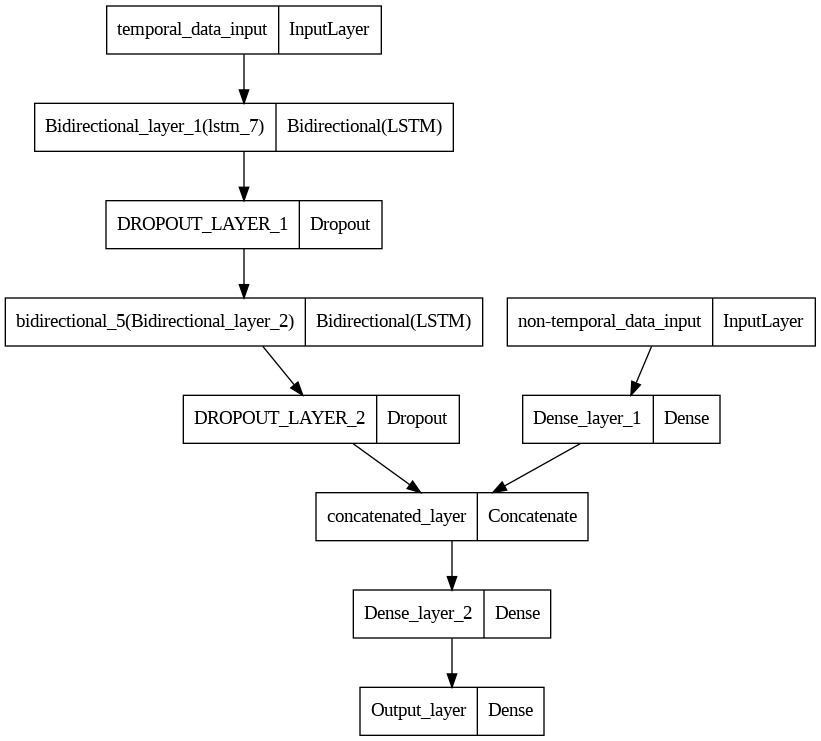

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(full_lstm_model)


Epoch 1/20
600/600 [==============================] - 30s 50ms/step - loss: 0.4325 - auc: 0.7734 - val_loss: 0.4392 - val_auc: 0.7653
Epoch 2/20
600/600 [==============================] - 29s 48ms/step - loss: 0.4312 - auc: 0.7752 - val_loss: 0.4373 - val_auc: 0.7676
Epoch 3/20
600/600 [==============================] - 29s 48ms/step - loss: 0.4304 - auc: 0.7762 - val_loss: 0.4378 - val_auc: 0.7666
Epoch 4/20
600/600 [==============================] - 30s 50ms/step - loss: 0.4304 - auc: 0.7769 - val_loss: 0.4400 - val_auc: 0.7705
Epoch 5/20
600/600 [==============================] - 29s 48ms/step - loss: 0.4307 - auc: 0.7763 - val_loss: 0.4368 - val_auc: 0.7695
Epoch 6/20
600/600 [==============================] - 32s 53ms/step - loss: 0.4292 - auc: 0.7777 - val_loss: 0.4363 - val_auc: 0.7707
Epoch 7/20
600/600 [==============================] - 29s 48ms/step - loss: 0.4290 - auc: 0.7777 - val_loss: 0.4371 - val_auc: 0.7674
Epoch 8/20
600/600 [==============================] - 28s 47ms

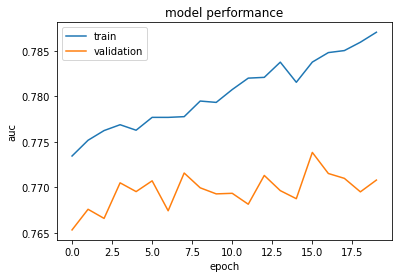

AttributeError: ignored

In [ ]:
history = full_lstm_model.fit([train_temporal_data, train_non_temporal_data],
                     y_train, batch_size = 32, epochs=20, validation_data=([val_temporal_data, val_non_temporal_data],y_val))


#summarize history for accuracy
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model performance')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


dict_keys(['loss', 'auc', 'val_loss', 'val_auc'])


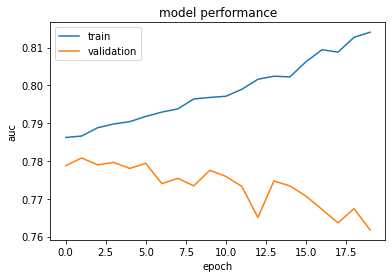

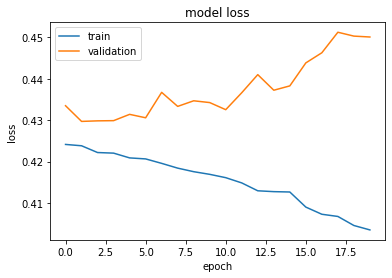

In [ ]:
print(history.history.keys())

#summarize history for accuracy
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model performance')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
lstm_results = full_lstm_model.evaluate([val_temporal_data, val_non_temporal_data],y_val)



150/150 [==============================] - 2s 14ms/step - loss: 0.4370 - auc: 0.7708


150/150 [==============================] - 4s 13ms/step - loss: 0.4481 - auc: 0.7614

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.layers import Bidirectional
from tensorflow.keras.utils import plot_model

from tensorflow.keras.layers import Input, LSTM, Dense, Concatenate, Reshape, RepeatVector, Dropout
from tensorflow.keras.models import Model

batch_size = 32
epochs = 20

def lstm_temp_model(train_temporal_data):
  #lstm input shape
  lstm_input = Input(shape=train_temporal_data.shape[1:], name= 'temporal_data_input')


  #lstm layers
  lstm_layer_1 = Bidirectional(LSTM(128,return_sequences=True),name ="Bidirectional_layer_1")(lstm_input)
  #dropout layer 1
  lstm_layer_1 = Dropout(0.1,name ="Dropout_layer_1")(lstm_layer_1)
  #lstm layer
  lstm_layer_2 = Bidirectional(LSTM(64,name ="Bidirectional_layer_2"))(lstm_layer_1)
  #dropout layer 2
  lstm_layer_2 = Dropout(0.1,name ="Dropout_layer_2")(lstm_layer_2)

  output = Dense(1,activation='sigmoid', name= 'Output_layer')(lstm_layer_2)

  #compile model
  temp_only_model = Model(inputs=[lstm_input],outputs=[output])

  temp_only_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC'])
  return temp_only_model

# # results
# temp_only_model.summary()
# temp_only_model = lstm_temp_model()

In [ ]:
temp_only_model = lstm_temp_model(train_temporal_data)
temp_only_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 temporal_data_input (InputL  [(None, 6, 3)]           0         
 ayer)                                                           
                                                                 
 Bidirectional_layer_1 (Bidi  (None, 6, 256)           135168    
 rectional)                                                      
                                                                 
 Dropout_layer_1 (Dropout)   (None, 6, 256)            0         
                                                                 
 bidirectional (Bidirectiona  (None, 128)              164352    
 l)                                                              
                                                                 
 Dropout_layer_2 (Dropout)   (None, 128)               0         
                                                             

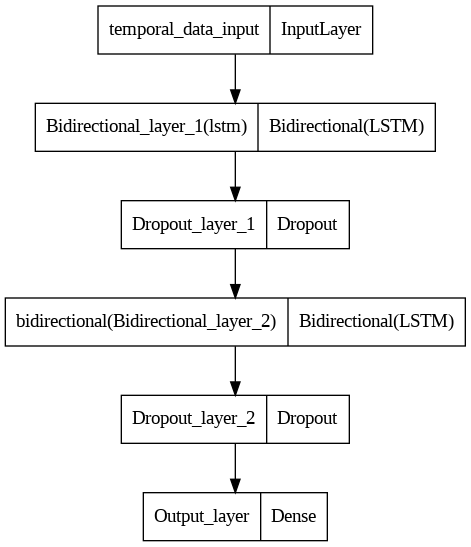

In [ ]:
plot_model(temp_only_model)

### Hyperp Tuning LSTM models

In [ ]:
# #if we want to do the hyperparameters, XGB Classifier might look something like this

# # lstm temporal only 
# kf = StratifiedKFold(n_splits=2, random_state=42, shuffle=True)

# model = keras.wrappers.scikit_learn.KerasClassifier(
#                                    build_fn=lstm_temp_model)

# # batch_size = [64, 128, 256]
# # epochs = [10,15,20,30, 50]

# batch_size = [32,64, 128, 256]
# epochs = [10, 20]

# random_grid = {'batch_size': batch_size,
#                'epochs': epochs,
#                }

# random_search = RandomizedSearchCV(estimator = model,
#                                    param_distributions = random_grid,
#                                    n_iter = 15,
#                                    cv = kf,
#                                    scoring = 'roc_auc',
#                                    n_jobs = 1,
#                                    random_state=1,
#                                    verbose=10
#                                   )

# random_search.fit(train_temporal_data, y_train)

# print("Parameters of the best_estimator:")
# print(random_search.best_params_)
# val_models.append(('temp_only_model',random_search.best_estimator_))
# # print("Mean cross-validated RMSE of the best_estimator: {}".format(-random_search.best_score_))
# # model = random_search.best_estimator_
# # print("Mean cross-validated F1 score of the best_estimator: {}".format(random_score.best_score_))



KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
The total space of parameters 6 is smaller than n_iter=15. Running 6 iterations. For exhaustive searches, use GridSearchCV.


Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV 1/2; 1/6] START batch_size=64, epochs=10....................................
Epoch 1/10
150/150 [==============================] - 17s 49ms/step - loss: 0.4932 - auc: 0.6782
Epoch 2/10
150/150 [==============================] - 9s 63ms/step - loss: 0.4423 - auc: 0.7551
Epoch 3/10
150/150 [==============================] - 8s 53ms/step - loss: 0.4413 - auc: 0.7544
Epoch 4/10
150/150 [==============================] - 9s 58ms/step - loss: 0.4398 - auc: 0.7600
Epoch 5/10
150/150 [==============================] - 10s 67ms/step - loss: 0.4386 - auc: 0.7596
Epoch 6/10
150/150 [==============================] - 10s 63ms/step - loss: 0.4384 - auc: 0.7611
Epoch 7/10
150/150 [==============================] - 9s 59ms/step - loss: 0.4379 - auc: 0.7635
Epoch 8/10
150/150 [==============================] - 10s 65ms/step - loss: 0.4368 - auc: 0.7629
Epoch 9/10
150/150 [==============================] - 8s 51ms/step - loss: 0.4380 - auc

In [ ]:
# #grid search from scratch to select the best epochs and batch_size, using a random sampling strategy for train,test split.
# import gc
# def lstm_hypertuning(X,y,model,cv): 
#   X_cleaned= (X.pipe(copy_df).
#                    pipe(scaler,numeric_features).
#                    pipe(category_dtype,cat_features).
#                    pipe(target_enc,cat_features,y))
  
#   # batch_size = [64, 128, 256]
#   # epochs = [5, 10, 15]

#   test_batch_size = [32, 32, 32,32,32,32]
#   test_epochs = [5, 10, 15,20,25,30]

#   #loop hyperparams and for each loop, split the df, train the model and evaluate performance
#   performance = {}
#   # for batch_size, epochs in hyperparams.items():
#   for batch_size, epochs in zip(test_batch_size,test_epochs):
#     print(f'Testing {batch_size}, {epochs}')
#     results = []
#     for i in range(cv):
#       X_train, X_val, y_train, y_val = train_test_split(X_cleaned, y, test_size=0.20, stratify=y)
#       train_non_temporal_data = X_train.iloc[:,:5]
#       train_temporal_data = X_train.iloc[:,5:]

#       val_non_temporal_data = X_val.iloc[:,:5]
#       val_temporal_data = X_val.iloc[:,5:]

#       train_temporal_data = np.array(train_temporal_data).reshape(train_temporal_data.shape[0],6,3)
#       val_temporal_data = np.array(val_temporal_data).reshape(val_temporal_data.shape[0],6,3)
#       print(f'cycle {i+1}')
#       compiled_model = lstm_model()
#       compiled_model.fit([train_temporal_data, train_non_temporal_data],
#                       y_train, batch_size = batch_size, epochs=epochs)
      
#       cycle_result = compiled_model.evaluate([val_temporal_data, val_non_temporal_data],y_val)
#       results.append(cycle_result[1])

#     mean_performance = np.mean(results)
#     performance[f'{batch_size},{epochs}'] = mean_performance
#     results = []
#     print(performance)
#     gc.collect()

#   return max(performance, key=performance.get), performance


# testing = lstm_hypertuning(X_train_pre, y_train,lstm_model(),5)
# print(testing)




Testing 32, 5
cycle 1
Epoch 1/5
480/480 [==============================] - 28s 42ms/step - loss: 0.4575 - auc: 0.7392
Epoch 2/5
480/480 [==============================] - 21s 43ms/step - loss: 0.4392 - auc: 0.7597
Epoch 3/5
480/480 [==============================] - 19s 39ms/step - loss: 0.4352 - auc: 0.7691
Epoch 4/5
480/480 [==============================] - 21s 43ms/step - loss: 0.4339 - auc: 0.7710
Epoch 5/5
120/120 [==============================] - 3s 14ms/step - loss: 0.4420 - auc: 0.7611
cycle 2
Epoch 1/5
480/480 [==============================] - 29s 44ms/step - loss: 0.4920 - auc: 0.6859
Epoch 2/5
480/480 [==============================] - 20s 42ms/step - loss: 0.4480 - auc: 0.7515
Epoch 3/5
480/480 [==============================] - 20s 42ms/step - loss: 0.4440 - auc: 0.7590
Epoch 4/5
480/480 [==============================] - 21s 43ms/step - loss: 0.4417 - auc: 0.7628
Epoch 5/5
120/120 [==============================] - 5s 16ms/step - loss: 0.4356 - auc: 0.7785
cycle 3
Epoc

{'64,20': 0.7286125063896179, '128,20': 0.6653854846954346, '256,20': 0.6084169745445251}
('64,20', {'64,20': 0.7286125063896179, '128,20': 0.6653854846954346, '256,20': 0.6084169745445251})

32,5: 0.766300129, 32,10: 0.66930 dud cycle

In [ ]:
# temp_only_model.fit(train_temporal_data,y_train, batch_size = 32, epochs=20)

Epoch 1/20
600/600 [==============================] - 12s 8ms/step - loss: 0.4614 - auc: 0.7293
Epoch 2/20
600/600 [==============================] - 5s 8ms/step - loss: 0.4404 - auc: 0.7582
Epoch 3/20
600/600 [==============================] - 5s 8ms/step - loss: 0.4394 - auc: 0.7597
Epoch 4/20
600/600 [==============================] - 5s 8ms/step - loss: 0.4382 - auc: 0.7613
Epoch 5/20
600/600 [==============================] - 5s 9ms/step - loss: 0.4375 - auc: 0.7622
Epoch 6/20
600/600 [==============================] - 5s 8ms/step - loss: 0.4369 - auc: 0.7639
Epoch 7/20
600/600 [==============================] - 5s 8ms/step - loss: 0.4361 - auc: 0.7647
Epoch 8/20
600/600 [==============================] - 5s 8ms/step - loss: 0.4358 - auc: 0.7658
Epoch 9/20
600/600 [==============================] - 5s 8ms/step - loss: 0.4349 - auc: 0.7659
Epoch 10/20
600/600 [==============================] - 6s 11ms/step - loss: 0.4330 - auc: 0.7694
Epoch 11/20
600/600 [==========================

In [ ]:
# lstm_results = full_lstm_model.evaluate([val_temporal_data, val_non_temporal_data],y_val)

150/150 [==============================] - 1s 4ms/step - loss: 0.4484 - auc: 0.7541


In [ ]:
# # print(history.history.keys())

# def plot_history(model):
#   plt.plot(model.history['auc'])
#   plt.plot(model.history['val_auc'])
#   plt.title(f'{model} performance')
#   plt.ylabel('auc')
#   plt.xlabel('epoch')
#   plt.legend(['train', 'validation'], loc='upper left')
#   plt.show()

#     # summarize history for loss
#   plt.plot(model.history['loss'])
#   plt.plot(model.history['val_loss'])
#   plt.title(f'{model} loss')
#   plt.ylabel('loss')
#   plt.xlabel('epoch')
#   plt.legend(['train', 'validation'], loc='upper left')
#   plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import brier_score_loss
from sklearn.metrics import f1_score
from imblearn.metrics import geometric_mean_score

# print(history.history.keys())

def plot_history(model):
  plt.plot(model.history['auc'])
  plt.plot(model.history['val_auc'])
  plt.title(f'{model} performance')
  plt.ylabel('auc')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

    # summarize history for loss
  plt.plot(model.history['loss'])
  plt.plot(model.history['val_loss'])
  plt.title(f'{model} loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

batch_size = 32
epochs = 20

#Modelling on test data

#experiment building
# val_models = [('full_lstm_model',full_lstm_model), ('temp_only_model',temp_only_model)]

def lstm_modelling(X_train_temp, X_train_non_temp, y_train, X_test_temp, X_test_non_temp, y_test, models, results,roc_plot_data,contingency_values,batch_size=32,epochs=20):

  #results = pd.DataFrame(columns=['classifiers','auc','accuracy', 'brier_score'])
  #roc_plot_data = pd.DataFrame(columns=['classifier', 'fpr', 'tpr', 'auc'])
  counter = 1
  for name, model in models:
    if name == 'full_lstm_model':
      full_lstm_model = model.fit([X_train_temp, X_train_non_temp],y_train,batch_size = batch_size, epochs=epochs, validation_data=([X_test_temp, X_test_non_temp],y_test))
      yproba = model.predict([X_test_temp, X_test_non_temp])
      y_pred = np.round(yproba,0)
      #print(history.history.keys())
      plots1 = plot_history(full_lstm_model)
      contingency_values[name] = y_pred

      #yproba = model.predict_proba([val_temporal_data, val_non_temporal_data])[:,1]
    else:
      temporal_lstm = model.fit(X_train_temp, y_train, batch_size = batch_size, epochs=epochs, validation_data=(X_test_temp, y_test))
      yproba = model.predict(X_test_temp)
      y_pred = np.round(yproba,0)
      plots2 = plot_history(temporal_lstm)
      contingency_values[name] = y_pred
      #yproba = model.predict_proba(val_temporal_data)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, yproba)
    auc = roc_auc_score(y_test, yproba)
    accuracy = accuracy_score(y_test,y_pred)
    print(name,accuracy)
    brier_score = brier_score_loss(y_test, yproba)
    f_one_score = f1_score(y_test,y_pred)
    g_mean = geometric_mean_score(y_test,y_pred)

    results = results.append({'classifier':name,
                                'auc':auc,
                                'accuracy':accuracy,
                                'brier_score':brier_score,
                                'f1_score':f_one_score,
                                'g_mean':g_mean},ignore_index=True)
    roc_plot_data = roc_plot_data.append({'classifier':name,
                                'fpr':fpr,
                                'tpr':tpr,
                                'auc':auc,},ignore_index=True)
    print("iteration " + str(counter) + " " + name)
    counter += 1
      
  results.set_index('classifier', inplace=True)    
  roc_plot_data.set_index('classifier', inplace=True)

  return results, roc_plot_data, plots1, plots2, contingency_values


In [ ]:
validation_results,validation_roc_plot_data, plot1,plot2, contingency_values = lstm_modelling(train_temporal_data, train_non_temporal_data,  val_temporal_data, val_non_temporal_data, y_val, val_models, 32,20,validation_results,validation_roc_plot_data, val_contingency_values)


default payment next month   LR  XGB  full_lstm_model  temp_only_model
7836                          0.0  0.0    0              0.0              0.0
24983                         0.0  0.0    0              0.0              0.0
13977                         0.0  0.0    0              0.0              0.0
17297                         0.0  0.0    0              0.0              0.0
23045                         0.0  0.0    0              0.0              0.0
...                           ...  ...  ...              ...              ...
9326                          0.0  0.0    0              0.0              0.0
6249                          0.0  0.0    0              1.0              0.0
22993                         0.0  1.0    0              1.0              1.0
6573                          0.0  0.0    0              0.0              0.0
11966                         0.0  0.0    0              0.0              0.0

[4800 rows x 5 columns]

### McNemar Test

In [ ]:
#McNemar Test
# http://rasbt.github.io/mlxtend/user_guide/evaluate/mcnemar/
#https://machinelearningmastery.com/mcnemars-test-for-machine-learning/

from mlxtend.evaluate import mcnemar_table
from statsmodels.stats.contingency_tables import mcnemar

def mcnemar_test(y_target,y_model1,y_model2):
  #convert predictions to an actual contingency table
  tb = mcnemar_table(y_target = y_target.to_numpy(),
                   y_model1 = y_model1.to_numpy(),
                   y_model2 = y_model2.to_numpy())

  print(tb)

  #calculate mcnemar test for lstm vs LR
  result = mcnemar(tb,exact=True)
  # summarize the finding
  statistic = 'statistic=%.3f, p-value=%.3f' % (result.statistic, result.pvalue)
  # interpret the p-value
  alpha = 0.05
  if result.pvalue > alpha:
    conclusion ="Same proportions of errors (fail to reject H0). 'We can see that the test strongly confirms that there is very little difference in the disagreements between the two cases. The null hypothesis not rejected. As we are using the test to compare classifiers, we state that there is no statistically significant difference in the disagreements between the two models.'"
  else:
    conclusion = 'Different proportions of errors (reject H0)'
  return tb,statistic,conclusion  



In [ ]:
lstm_lr = mcnemar_test(contingency_values['default payment next month'],contingency_values['full_lstm_model'],contingency_values['LR'])
lstm_xgb = mcnemar_test(contingency_values['default payment next month'],contingency_values['full_lstm_model'],contingency_values['XGB'])
lstm_temp_only = mcnemar_test(contingency_values['default payment next month'],contingency_values['full_lstm_model'],contingency_values['temp_only_model'])

lstm_lr,lstm_xgb,lstm_temp_only

fpr  \
classifier                                                              
LogisticRegression  [0.0, 0.0, 0.0, 0.00026752273943285177, 0.0002...   
XGBClassifier       [0.0, 0.0, 0.0, 0.00026752273943285177, 0.0002...   
full_lstm_model     [0.0, 0.0, 0.0, 0.00026752273943285177, 0.0002...   
temp_only_model     [0.0, 0.0, 0.0, 0.00026752273943285177, 0.0002...   

                                                                  tpr  \
classifier                                                              
LogisticRegression  [0.0, 0.0009416195856873823, 0.002824858757062...   
XGBClassifier       [0.0, 0.0009416195856873823, 0.003766478342749...   
full_lstm_model     [0.0, 0.0009416195856873823, 0.005649717514124...   
temp_only_model     [0.0, 0.0009416195856873823, 0.003766478342749...   

                         auc  
classifier                    
LogisticRegression  0.757713  
XGBClassifier       0.778640  
full_lstm_model     0.772051  
temp_only_model     0.759684

auc  accuracy  brier_score  f1_score    g_mean
classifier                                                          
LR               0.757713  0.815417     0.138831  0.439241  0.558386
XGB              0.778640  0.815417     0.136768  0.429858  0.548824
full_lstm_model  0.772051  0.815208     0.137693  0.394539  0.513643
temp_only_model  0.759684  0.819167     0.138684  0.477738  0.594577

In [ ]:
import matplotlib.pyplot as plt

def roc_plotting(roc_data):
  fig = plt.figure(figsize=(14,14))




  for i in roc_data.index:
      plt.plot(roc_data.loc[i]['fpr'], 
              roc_data.loc[i]['tpr'], 
              label="{}, AUC={:.3f}".format(i, roc_data.loc[i]['auc']))
      
  plt.plot([0,1], [0,1], color='orange', linestyle='--')

  plt.xlim([0, 1])
  plt.ylim([0, 1])

  plt.xticks(np.arange(0.0, 1.1, step=0.1))
  plt.xlabel("False Positive Rate", fontsize=15)

  plt.yticks(np.arange(0.0, 1.1, step=0.1))
  plt.ylabel("True Positive Rate", fontsize=15)

  plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
  plt.legend(prop={'size':13}, loc='lower right')

  return plt.show()
  # plt.savefig('ROC Curve Analysis')

#Testing

In [ ]:
X_train= (X_1.pipe(copy_df).
                   pipe(scaler,numeric_features).
                   pipe(category_dtype,cat_features).
                   pipe(target_enc,cat_features,y_1))

X_test = (X_test.pipe(copy_df).
                pipe(scaler,numeric_features).
                pipe(category_dtype,cat_features).
                pipe(target_enc,cat_features,y_test))


# X_1, X_test, y_1, y_test

train_non_temporal_data,train_temporal_data,test_non_temporal_data,test_temporal_data = lstm_data_cleaning(X_train,X_test)
full_lstm_model = lstm_model(train_non_temporal_data,train_temporal_data)
temp_only_model = lstm_temp_model(train_temporal_data)
ml_models = [('LR', LogisticRegression(solver='saga', max_iter=200)), ('XGB', XGBClassifier(subsample= 0.6, n_estimators=300, max_depth= 10, learning_rate= 0.01, colsample_bytree= 0.5))]
lstm_models = [('full_lstm_model',full_lstm_model), ('temp_only_model',temp_only_model)]

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
ml_results,ml_roc_plot_data,ml_contingency_values = ml_modelling(X_train,y_1,X_test,y_test,ml_models)
# test_results,test_roc_plot_data, lstm_plot,lstm_temp_plot,test_contingency_values = lstm_modelling(train_temporal_data, train_non_temporal_data,  val_temporal_data, val_non_temporal_data, y_val, lstm_models, 32,20,ml_results,ml_roc_plot_data,contingency_values)


The max_iter was reached which means the coef_ did not converge
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


iteration 1 LR
iteration 2 XGB


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [ ]:
ml_results

classifier       auc  accuracy  brier_score  f1_score    g_mean
0         LR  0.751429  0.815500     0.138986  0.445113  0.564403
1        XGB  0.773168  0.815667     0.137206  0.427536  0.546297

Epoch 1/20
750/750 [==============================] - 43s 47ms/step - loss: 0.4686 - auc: 0.7262 - val_loss: 0.4478 - val_auc: 0.7583
Epoch 2/20
750/750 [==============================] - 37s 49ms/step - loss: 0.4450 - auc: 0.7572 - val_loss: 0.4451 - val_auc: 0.7648
Epoch 3/20
750/750 [==============================] - 35s 47ms/step - loss: 0.4409 - auc: 0.7635 - val_loss: 0.4499 - val_auc: 0.7625
Epoch 4/20
750/750 [==============================] - 34s 46ms/step - loss: 0.4389 - auc: 0.7670 - val_loss: 0.4426 - val_auc: 0.7615
Epoch 5/20
750/750 [==============================] - 33s 44ms/step - loss: 0.4382 - auc: 0.7672 - val_loss: 0.4420 - val_auc: 0.7656
Epoch 6/20
750/750 [==============================] - 35s 47ms/step - loss: 0.4374 - auc: 0.7675 - val_loss: 0.4412 - val_auc: 0.7648
Epoch 7/20
750/750 [==============================] - 34s 45ms/step - loss: 0.4359 - auc: 0.7697 - val_loss: 0.4391 - val_auc: 0.7689
Epoch 8/20
750/750 [==============================] - 32s 43ms

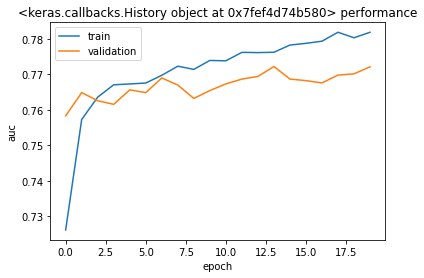

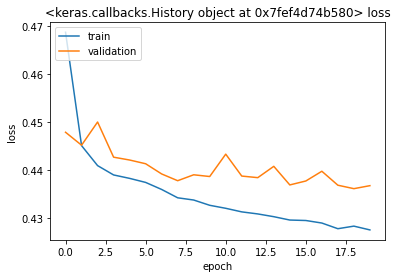

full_lstm_model 0.8178333333333333
iteration 1 full_lstm_model
Epoch 1/20


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


750/750 [==============================] - 46s 50ms/step - loss: 0.4565 - auc: 0.7374 - val_loss: 0.4463 - val_auc: 0.7633
Epoch 2/20
750/750 [==============================] - 34s 46ms/step - loss: 0.4417 - auc: 0.7574 - val_loss: 0.4428 - val_auc: 0.7614
Epoch 3/20
750/750 [==============================] - 36s 48ms/step - loss: 0.4406 - auc: 0.7572 - val_loss: 0.4395 - val_auc: 0.7661
Epoch 4/20
750/750 [==============================] - 36s 48ms/step - loss: 0.4390 - auc: 0.7606 - val_loss: 0.4397 - val_auc: 0.7661
Epoch 5/20
750/750 [==============================] - 34s 45ms/step - loss: 0.4373 - auc: 0.7630 - val_loss: 0.4388 - val_auc: 0.7654
Epoch 6/20
750/750 [==============================] - 35s 47ms/step - loss: 0.4374 - auc: 0.7626 - val_loss: 0.4406 - val_auc: 0.7663
Epoch 7/20
750/750 [==============================] - 33s 43ms/step - loss: 0.4366 - auc: 0.7633 - val_loss: 0.4381 - val_auc: 0.7670
Epoch 8/20
750/750 [==============================] - 34s 45ms/step - los

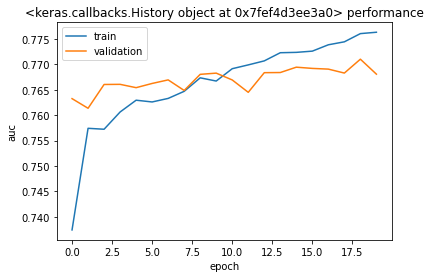

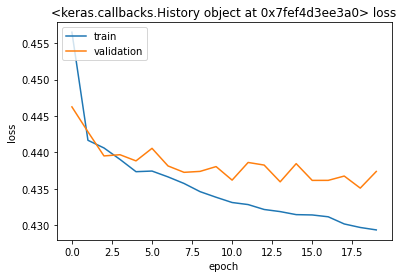

temp_only_model 0.819
iteration 2 temp_only_model


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [ ]:
test_results,test_roc_plot_data, lstm_plot,lstm_temp_plot,test_contingency_values = lstm_modelling(train_temporal_data, train_non_temporal_data, y_1,  test_temporal_data, test_non_temporal_data, y_test, lstm_models, ml_results, ml_roc_plot_data, ml_contingency_values, batch_size=32, epochs=20)
# lstm_modelling(X_train_temp, X_train_non_temp, y_train, X_test_temp, X_test_non_temp, y_test, models,results,roc_plot_data,contingency_values,batch_size,epochs)

In [ ]:
lstm_plot
lstm_temp_plot

In [ ]:
lstm_lr = mcnemar_test(test_contingency_values['default_payment_next_month'],test_contingency_values['full_lstm_model'],test_contingency_values['LR'])
lstm_xgb = mcnemar_test(test_contingency_values['default_payment_next_month'],test_contingency_values['full_lstm_model'],test_contingency_values['XGB'])
lstm_temp_only = mcnemar_test(test_contingency_values['default_payment_next_month'],test_contingency_values['full_lstm_model'],test_contingency_values['temp_only_model'])

[[4851   47]
 [  56 1046]]
[[4848   46]
 [  59 1047]]
[[4842   72]
 [  65 1021]]


In [ ]:
print(lstm_lr,lstm_xgb, lstm_temp_only)

(array([[4851,   47],
       [  56, 1046]]), 'statistic=47.000, p-value=0.431', "Same proportions of errors (fail to reject H0). 'We can see that the test strongly confirms that there is very little difference in the disagreements between the two cases. The null hypothesis not rejected. As we are using the test to compare classifiers, we state that there is no statistically significant difference in the disagreements between the two models.'") (array([[4848,   46],
       [  59, 1047]]), 'statistic=46.000, p-value=0.241', "Same proportions of errors (fail to reject H0). 'We can see that the test strongly confirms that there is very little difference in the disagreements between the two cases. The null hypothesis not rejected. As we are using the test to compare classifiers, we state that there is no statistically significant difference in the disagreements between the two models.'") (array([[4842,   72],
       [  65, 1021]]), 'statistic=65.000, p-value=0.608', "Same proportions of err

In [ ]:
xgb_lr = mcnemar_test(test_contingency_values['default_payment_next_month'],test_contingency_values['XGB'],test_contingency_values['LR'])
xgb_xgb = mcnemar_test(test_contingency_values['default_payment_next_month'],test_contingency_values['XGB'],test_contingency_values['full_lstm_model'])
xgb_temp_only = mcnemar_test(test_contingency_values['default_payment_next_month'],test_contingency_values['XGB'],test_contingency_values['temp_only_model'])

[[4835   63]
 [  59 1043]]
[[4848   59]
 [  46 1047]]
[[4815   99]
 [  79 1007]]


In [ ]:
print(xgb_lr,xgb_xgb, xgb_temp_only)

(array([[4835,   63],
       [  59, 1043]]), 'statistic=59.000, p-value=0.786', "Same proportions of errors (fail to reject H0). 'We can see that the test strongly confirms that there is very little difference in the disagreements between the two cases. The null hypothesis not rejected. As we are using the test to compare classifiers, we state that there is no statistically significant difference in the disagreements between the two models.'") (array([[4848,   59],
       [  46, 1047]]), 'statistic=46.000, p-value=0.241', "Same proportions of errors (fail to reject H0). 'We can see that the test strongly confirms that there is very little difference in the disagreements between the two cases. The null hypothesis not rejected. As we are using the test to compare classifiers, we state that there is no statistically significant difference in the disagreements between the two models.'") (array([[4815,   99],
       [  79, 1007]]), 'statistic=79.000, p-value=0.154', "Same proportions of err

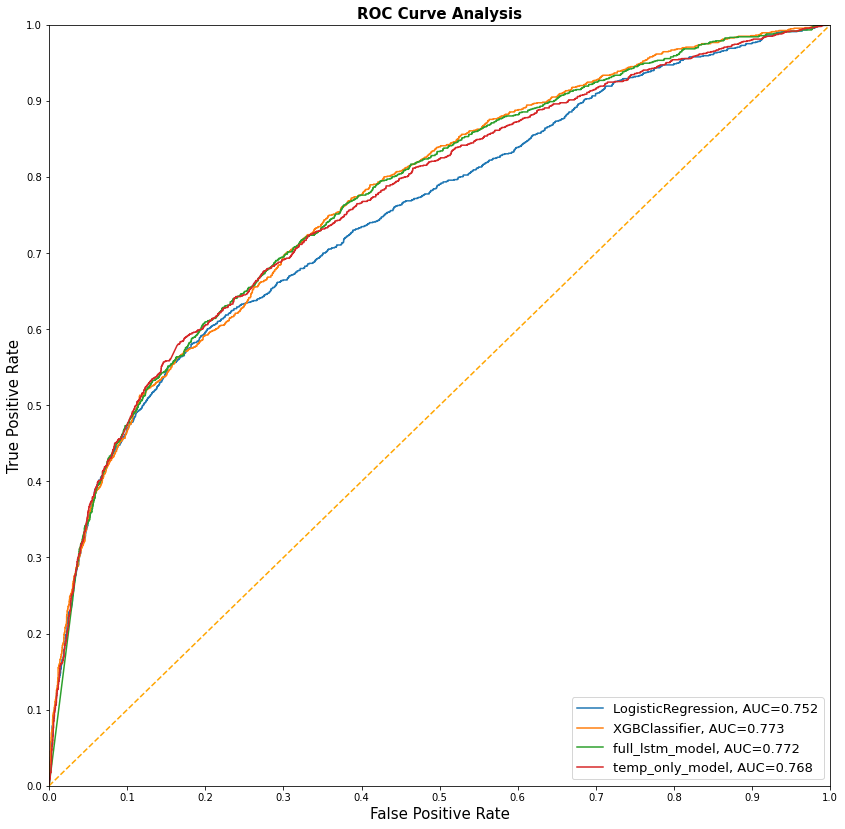

In [ ]:
roc_plotting(test_roc_plot_data)

In [ ]:
test_results

auc  accuracy  brier_score  f1_score    g_mean
classifier                                                          
LR               0.751543  0.816333     0.139070  0.446787  0.565292
XGB              0.773168  0.815667     0.137206  0.427536  0.546297
full_lstm_model  0.771995  0.817833     0.137309  0.446582  0.563567
temp_only_model  0.768099  0.819000     0.137166  0.478887  0.596049

#Explainability

In [ ]:
X_train.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'BILL_AMT1', 'PAY_AMT1', 'PAY_2', 'BILL_AMT2', 'PAY_AMT2', 'PAY_3',
       'BILL_AMT3', 'PAY_AMT3', 'PAY_4', 'BILL_AMT4', 'PAY_AMT4', 'PAY_5',
       'BILL_AMT5', 'PAY_AMT5', 'PAY_6', 'BILL_AMT6', 'PAY_AMT6'],
      dtype='object')

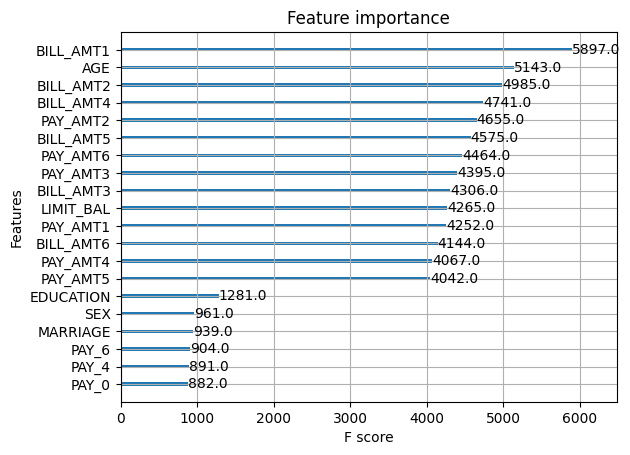

In [ ]:
# feature importance
#xgb
from xgboost import plot_importance

xgb = XGBClassifier(subsample= 0.6, n_estimators=300, max_depth= 10, learning_rate= 0.01, colsample_bytree= 0.5)

clf = xgb.fit(X_train,y_train)

# # fitted_model.get_booster().feature_names = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
#        'BILL_AMT1', 'PAY_AMT1', 'PAY_2', 'BILL_AMT2', 'PAY_AMT2', 'PAY_3',
#        'BILL_AMT3', 'PAY_AMT3', 'PAY_4', 'BILL_AMT4', 'PAY_AMT4', 'PAY_5',
#        'BILL_AMT5', 'PAY_AMT5', 'PAY_6', 'BILL_AMT6', 'PAY_AMT6']

plot_importance(clf, max_num_features=20) #top 10 most important features
plt.show()



In [ ]:
# https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance_multicollinear.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-multicollinear-py

from sklearn.inspection import permutation_importance

# clf = test_models[1][1]

result = permutation_importance(clf, X_test, y_test, n_repeats=30, random_state=0)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(tree_indices, clf.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticks(tree_indices)
ax1.set_yticklabels(X_test.columns[tree_importance_sorted_idx])
ax1.set_ylim((0, len(clf.feature_importances_)))
ax2.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=X_test.columns[perm_sorted_idx],
)
fig.tight_layout()
plt.show()


KeyboardInterrupt: ignored

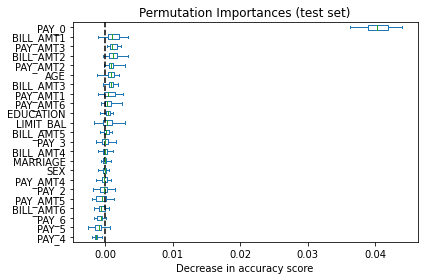

In [ ]:
from sklearn.inspection import permutation_importance

# result = permutation_importance(
#     rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
# )

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X_test.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

In [ ]:
# https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance_multicollinear.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-multicollinear-py

from sklearn.inspection import permutation_importance

# clf = test_models[1][1]

result = permutation_importance(clf, X_test, y_test, n_repeats=30, random_state=0)



In [ ]:
perm_sorted_idx = result.importances_mean.argsort()[:11]

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)[:11]
tree_indices = np.arange(0, len(clf.feature_importances_[:11])) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(tree_indices, clf.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticks(tree_indices)
ax1.set_yticklabels(X_test.columns[tree_importance_sorted_idx])
ax1.set_ylim((0, len(clf.feature_importances_[:11])))
ax2.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=X_test.columns[perm_sorted_idx],
)
fig.tight_layout()
plt.show()

NameError: ignored

In [ ]:
clf.feature_importances_
result.importances_mean

tree_importance_sorted_idx

array([37, 25, 31, 83, 36, 38, 44, 47, 48, 50, 51])

In [ ]:
#shap
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test[:20])

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [ ]:
shap_values

array([[ 0.12828995,  0.01842145,  0.00880817, -0.01747457,  0.02710038,
        -0.16146046,  0.02294291, -0.1555208 , -0.08838405, -0.04183498,
        -0.02494861, -0.04386652, -0.02097092, -0.01930238, -0.0386428 ,
        -0.0062215 , -0.04319425, -0.02212157, -0.01853367,  0.00543315,
        -0.03128282, -0.00906202, -0.04286285],
       [-0.06655008,  0.01979657, -0.02339078,  0.02412574, -0.03567042,
        -0.11337282, -0.09008096,  0.06528607, -0.08211206,  0.01672844,
        -0.03889918, -0.0601565 ,  0.00663342,  0.0633445 , -0.01059611,
         0.05973613, -0.00819866, -0.02540108,  0.04694244, -0.03710642,
         0.00706933, -0.01799376, -0.03048418],
       [ 0.24551557,  0.02472418,  0.02861088, -0.02235637,  0.01862948,
        -0.28163448, -0.06934071, -0.00842422, -0.10153464, -0.01412775,
        -0.03703338, -0.04418704,  0.0099696 , -0.01244511, -0.02895335,
         0.02997457, -0.02306563, -0.02371862, -0.0154564 , -0.03454167,
        -0.02098956,  0.0199

In [ ]:
#single pred
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])
# plt.savefig('xgb_shap_force_plot.png')


In [ ]:
#single pred
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[15,:], X_test.iloc[15,:],show=False,matplotlib=True).savefig('scratch.png',format = "png",dpi = 150,bbox_inches = 'tight')
# plt.savefig('xgb_shap_force_plot2.png')

# for i in range(10):
#   shap.force_plot(explainer.expected_value, shap_values[i,:], X_test.iloc[i,:])


In [ ]:
X_test.iloc[5]

LIMIT_BAL    200000
SEX               1
EDUCATION         1
MARRIAGE          1
AGE              29
PAY_0             1
BILL_AMT1    199417
PAY_AMT1          0
PAY_2             2
BILL_AMT2    188778
PAY_AMT2       8278
PAY_3             0
BILL_AMT3    195335
PAY_AMT3       4100
PAY_4             0
BILL_AMT4    194775
PAY_AMT4     180000
PAY_5             0
BILL_AMT5    197105
PAY_AMT5     202317
PAY_6             0
BILL_AMT6    204122
PAY_AMT6          0
Name: 29382, dtype: int64

In [ ]:
y_test.iloc[:15]

6907     0
24575    0
26766    0
2156     1
3179     0
29382    0
24454    0
23886    0
5504     0
29720    0
6908     0
2159     0
20842    1
25128    0
18808    0
Name: default_payment_next_month, dtype: int64

# Bar chart of mean importance

This takes the average of the SHAP value magnitudes across the dataset and plots it as a simple bar chart.

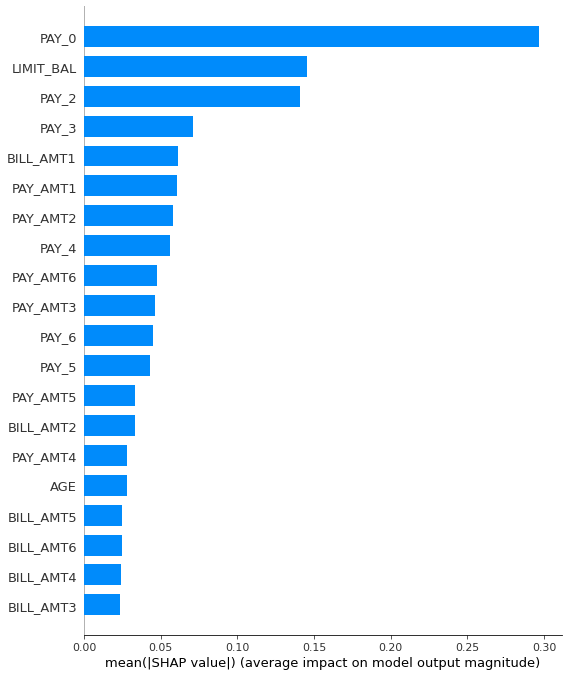

In [ ]:
shap.summary_plot(shap_values, X_train, plot_type="bar")
# plt.savefig('xgb_shap_mean_importance.png')

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


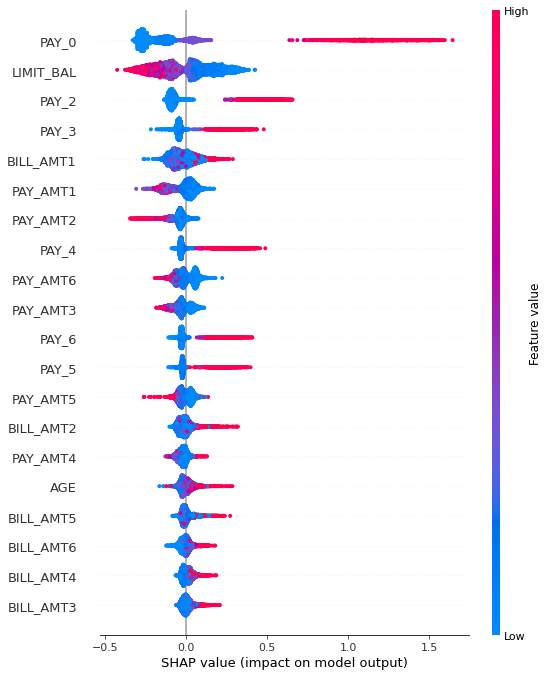

In [ ]:
#summary plot
shap.initjs()
shap.summary_plot(shap_values, X_test)
# plt.savefig('xgb_shap_summary_plot.png')

In [ ]:
# Logistic Regression explainability
lr = LogisticRegression(solver='saga', max_iter=200)
lr.fit(X_train,y_1)
lr.coef_

The max_iter was reached which means the coef_ did not converge


array([[-0.19505219, -0.42405006, -0.38373197, -0.4762842 ,  0.0783405 ,
         3.501138  , -0.08301629, -0.17377819,  0.79903575,  0.12794352,
        -0.1652393 ,  0.77862223,  0.0530243 , -0.02183217,  0.78548563,
         0.04157442, -0.01428973,  0.70226884, -0.0373877 , -0.01360496,
         0.7352476 , -0.0681038 , -0.03866006]])

In [ ]:
lr.intercept_

array([-2.77948848])

In [ ]:

feature_list = []
total_importance = 0

# Make a dataframe of Coefficients and Feature Names
for feature in zip(X, lr.coef_[0]):
    feature_list.append(feature)
    total_importance += feature[1]

# create DataFrame using data
df_imp = pd.DataFrame(feature_list, columns =['FEATURE', 'COEFFICIENT']).sort_values(by='COEFFICIENT', ascending=False)
df_imp.sort_values(by='COEFFICIENT', ascending=False)


FEATURE  COEFFICIENT
5       PAY_0     3.501138
8       PAY_2     0.799036
14      PAY_4     0.785486
11      PAY_3     0.778622
20      PAY_6     0.735248
17      PAY_5     0.702269
9   BILL_AMT2     0.127944
4         AGE     0.078340
12  BILL_AMT3     0.053024
15  BILL_AMT4     0.041574
19   PAY_AMT5    -0.013605
16   PAY_AMT4    -0.014290
13   PAY_AMT3    -0.021832
18  BILL_AMT5    -0.037388
22   PAY_AMT6    -0.038660
21  BILL_AMT6    -0.068104
6   BILL_AMT1    -0.083016
10   PAY_AMT2    -0.165239
7    PAY_AMT1    -0.173778
0   LIMIT_BAL    -0.195052
2   EDUCATION    -0.383732
1         SEX    -0.424050
3    MARRIAGE    -0.476284

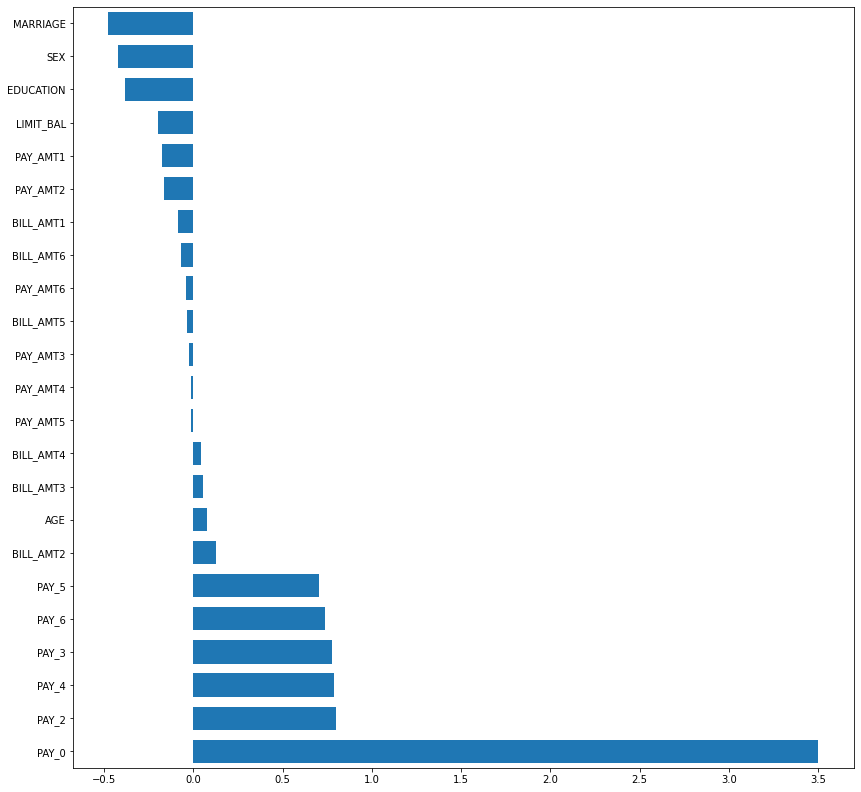

In [ ]:
# ax = df_imp.plot.box(vert=False, whis=10)
# ax.set_title("Permutation Importances (test set)")
# ax.axvline(x=0, color="k", linestyle="--")
# ax.set_xlabel("Decrease in accuracy score")
# ax.figure.tight_layout()

# ax1.barh(tree_indices, df_imp['COEFFICIENT'], height=0.7)
# ax1.set_yticks(tree_indices)
# ax1.set_yticklabels(X_test.columns[tree_importance_sorted_idx])
# ax1.set_ylim((0, len(clf.feature_importances_)))

fig,ax = plt.subplots(figsize=(14,14))

# tree_importance_sorted_idx = np.argsort(df_imp['COEFFICIENT'])[:25]
lr_indices = np.arange(0, len(df_imp['COEFFICIENT'])) + 0.5
ax.barh(tree_indices, df_imp['COEFFICIENT'], height=0.7)
ax.set_yticks(lr_indices)
ax.set_yticklabels(df_imp['FEATURE'])
ax.set_ylim((0, len(df_imp['COEFFICIENT'])))

plt.show()

In [ ]:

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)[:11]
tree_indices = np.arange(0, len(clf.feature_importances_[:11])) + 0.5
ax1.barh(tree_indices, clf.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticks(tree_indices)
ax1.set_yticklabels(X_test.columns[tree_importance_sorted_idx])
ax1.set_ylim((0, len(clf.feature_importances_)))

In [ ]:
#rearrange the feature order
# train_temporal_data = temporal_data[['PAY_0','BILL_AMT1','PAY_AMT1', 'PAY_2','BILL_AMT2','PAY_AMT2','PAY_3','BILL_AMT3','PAY_AMT3','PAY_4','BILL_AMT4','PAY_AMT4',
#  'PAY_5','BILL_AMT5','PAY_AMT5','PAY_6','BILL_AMT6','PAY_AMT6']]

# test_temporal_data = temporal_data[['PAY_0','BILL_AMT1','PAY_AMT1', 'PAY_2','BILL_AMT2','PAY_AMT2','PAY_3','BILL_AMT3','PAY_AMT3','PAY_4','BILL_AMT4','PAY_AMT4',
#  'PAY_5','BILL_AMT5','PAY_AMT5','PAY_6','BILL_AMT6','PAY_AMT6']]

In [ ]:
train_temporal_data

array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          1.50129992,  0.56369118],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          1.73455733, -0.25698952],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          1.7524289 , -0.29680127],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          1.8816057 ,  0.08131823],
        [ 0.        ,  0.        ,  1.        , ...,  0.        ,
          2.01278558,  0.49094039],
        [ 0.        ,  0.        ,  1.        , ...,  0.        ,
          2.0844122 ,  0.04975468]],

       [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         -0.69564183, -0.33874172],
        [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         -0.69023876, -0.25698952],
        [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         -0.67792868, -0.29680127],
        [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         -0.67

In [ ]:
train_temporal_data.shape[1:]
# train_non_temporal_data.shape[1]

(6, 13)

[0.4383298456668854, 0.7709982395172119]

## LSTM Explainability

In [ ]:

clf1 = temp_only_model.fit(train_temporal_data, y_1, batch_size = 32, epochs=1)

Train on 24000 samples
24000/24000 [==============================] - 33s 1ms/sample - loss: 0.4575 - auc_4: 0.7348


In [ ]:

from sklearn.inspection import permutation_importance


result = permutation_importance(clf,test_temporal_data, y_test, n_repeats=30, random_state=0)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(tree_indices, clf.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticks(tree_indices)
ax1.set_yticklabels(X_test.columns[tree_importance_sorted_idx])
ax1.set_ylim((0, len(clf.feature_importances_)))
ax2.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=X_test.columns[perm_sorted_idx],
)
fig.tight_layout()
plt.show()


ValueError: ignored

In [ ]:
#shap
import shap

# we use the first 100 training examples as our background dataset to integrate over
explainer = shap.DeepExplainer(temp_only_model, train_temporal_data[:1000])

# explain the first 10 predictions
# explaining each prediction requires 2 * background dataset size runs
shap_values = explainer.shap_values(test_temporal_data[:100])

In [ ]:
X_train.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'BILL_AMT1', 'PAY_AMT1', 'PAY_2', 'BILL_AMT2', 'PAY_AMT2', 'PAY_3',
       'BILL_AMT3', 'PAY_AMT3', 'PAY_4', 'BILL_AMT4', 'PAY_AMT4', 'PAY_5',
       'BILL_AMT5', 'PAY_AMT5', 'PAY_6', 'BILL_AMT6', 'PAY_AMT6'],
      dtype='object')

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][0], features)

In [ ]:
shap.initjs()
features = ['PAY','BILL_AMT','PAY_AMT']
i = 0
j = 0
x_test_df = pd.DataFrame(data=testing[i][j].reshape(1,3), columns = features)
shap.force_plot(explainer.expected_value[0], shap_values[0][i][j], x_test_df)

In [ ]:
shap_values_2D = shap_values[0].reshape(-1,3)
X_test_2d = testing.reshape(-1,3)
len_test_set = X_test_2d.shape[0]
X_test_2d

array([[ 1.73425367e-01, -6.76801199e-01,  1.11633585e+00],
       [ 1.59336100e-01, -3.28135920e-01, -1.91156137e-01],
       [ 1.57676349e-01, -6.52254926e-01, -9.97624846e-02],
       [ 1.57439446e-01, -6.26889215e-01, -1.48129339e-01],
       [ 1.87481547e-01, -6.11382716e-01, -1.95068512e-01],
       [ 1.84258694e-01, -6.09572531e-01, -1.32524039e-01],
       [ 1.73425367e-01, -4.95240491e-01, -3.21262903e-01],
       [ 1.59336100e-01, -6.87637822e-01, -1.91156137e-01],
       [ 2.06134969e-01, -6.52254926e-01, -2.92912484e-01],
       [ 2.19288175e-01, -6.67370047e-01, -2.77858546e-01],
       [ 2.18714769e-01, -6.65396167e-01,  4.19243311e-01],
       [ 1.73539519e-01, -4.62016215e-01,  1.42094595e+00],
       [ 1.28552097e-01, -4.92297339e-02, -2.21965982e-01],
       [ 1.57427938e-01, -2.05727998e-02, -1.33236867e-01],
       [ 1.69757033e-01,  1.90498617e-02, -1.70524812e-01],
       [ 1.78015267e-01,  9.56401833e-02, -1.66023022e-01],
       [ 1.87481547e-01,  1.55852326e-01

_______ time step 0 ___________


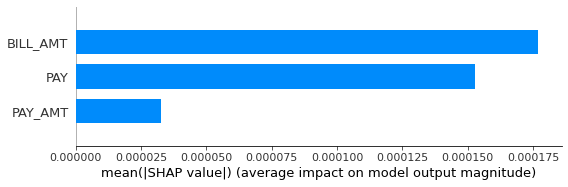

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


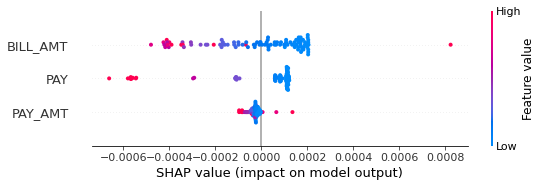



_______ time step 1 ___________


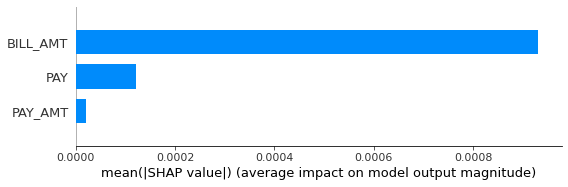

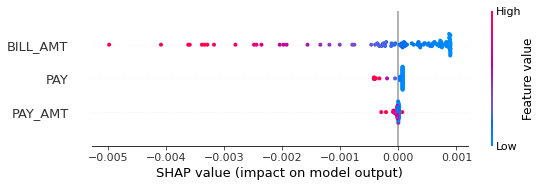



_______ time step 2 ___________


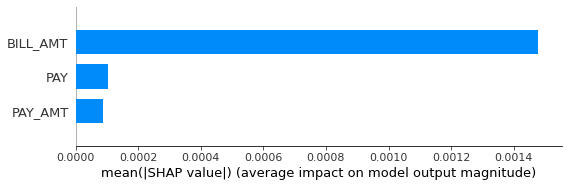

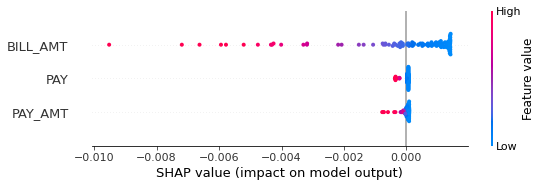



_______ time step 3 ___________


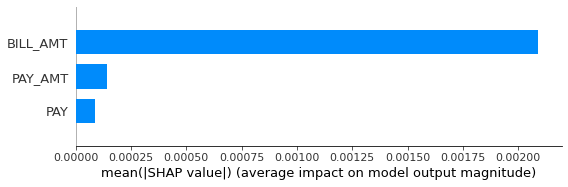

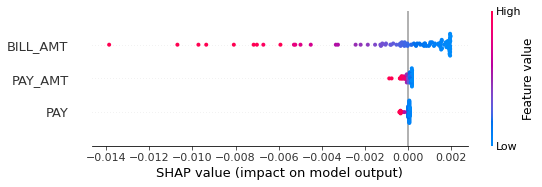



_______ time step 4 ___________


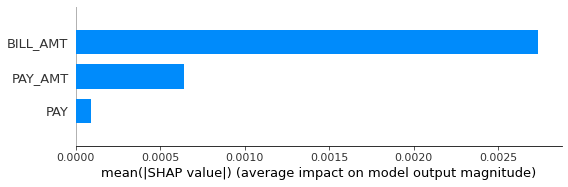

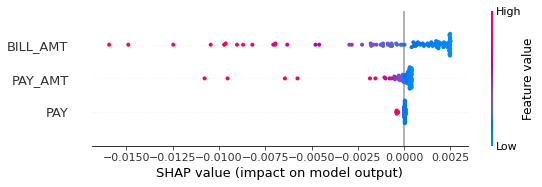



_______ time step 5 ___________


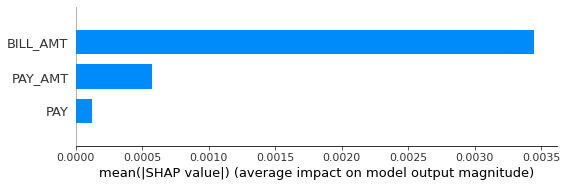

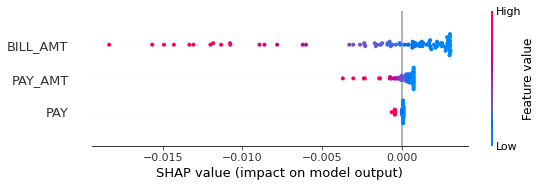

In [ ]:
shap_values_2D = shap_values[0].reshape(-1,3)
X_test_2d = testing.reshape(-1,3)
len_test_set = X_test_2d.shape[0]

## SHAP for each time step
NUM_STEPS = 6
NUM_FEATURES = 3


# step = 0
for step in range(NUM_STEPS):
    indice = [i for i in list(range(len_test_set)) if i%NUM_STEPS == step]
    shap_values_2D_step = shap_values_2D[indice]
    x_test_2d_step = X_test_2d[indice]
    print("_______ time step {} ___________".format(step))
    shap.summary_plot(shap_values_2D_step, x_test_2d_step, plot_type="bar",feature_names=features)
    shap.summary_plot(shap_values_2D_step, x_test_2d_step,feature_names=features)
    print("\n")

In [ ]:
shap.summary_plot(shap_values, X, plot_type="bar")


In [ ]:
#summary plot
shap.initjs()
shap.summary_plot(shap_values, X)